In [70]:
import wrangle_zillow

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
import scipy.stats as stats

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

Pulling in all data for explore

In [2]:
df = wrangle_zillow.get_zillow()


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52319 entries, 0 to 52318
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52319 non-null  int64  
 1   airconditioningtypeid         13615 non-null  float64
 2   architecturalstyletypeid      70 non-null     float64
 3   basementsqft                  47 non-null     float64
 4   bathroomcnt                   52319 non-null  float64
 5   bedroomcnt                    52319 non-null  float64
 6   buildingclasstypeid           0 non-null      float64
 7   buildingqualitytypeid         33654 non-null  float64
 8   calculatedbathnbr             52184 non-null  float64
 9   decktypeid                    389 non-null    float64
 10  finishedfloor1squarefeet      4371 non-null   float64
 11  calculatedfinishedsquarefeet  52238 non-null  float64
 12  finishedsquarefeet12          52073 non-null  float64
 13  f

In [4]:
df = wrangle_zillow.clean_zillow(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42136 entries, 0 to 52318
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   bathrooms                  42136 non-null  float16       
 1   bedrooms                   42136 non-null  uint8         
 2   square_footage             42136 non-null  uint16        
 3   county                     42136 non-null  object        
 4   latitude                   42136 non-null  float64       
 5   longitude                  42136 non-null  float64       
 6   lot_size                   42136 non-null  float64       
 7   propertycountylandusecode  42136 non-null  object        
 8   regionidzip                42136 non-null  float64       
 9   yearbuilt                  42136 non-null  uint16        
 10  structure_tax_value        42136 non-null  float64       
 11  tax_value                  42136 non-null  float64       
 12  land

In [6]:
columns_to_scale = df.select_dtypes('number').columns.drop(['latitude', 'longitude','regionidzip'])

In [7]:
train, validate, test, train_scaled, validate_scaled, test_scaled = wrangle_zillow.prepare_all_data(df, columns_to_scale)

Validating data is the split appropriately and the same

In [8]:
train.shape, validate.shape, test.shape

((23595, 16), (10113, 16), (8428, 16))

In [9]:
train_scaled.shape, validate_scaled.shape, test_scaled.shape

((23595, 16), (10113, 16), (8428, 16))

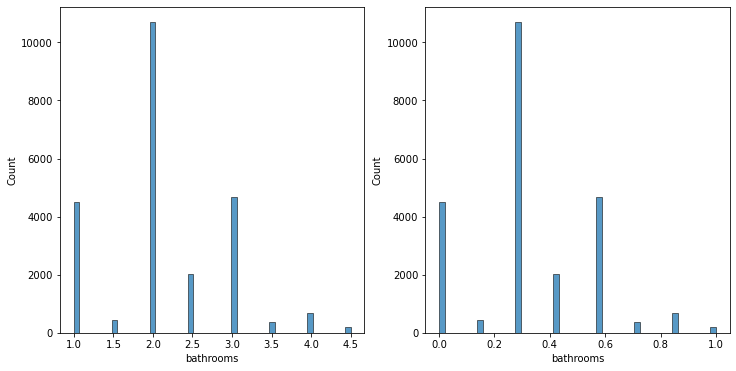

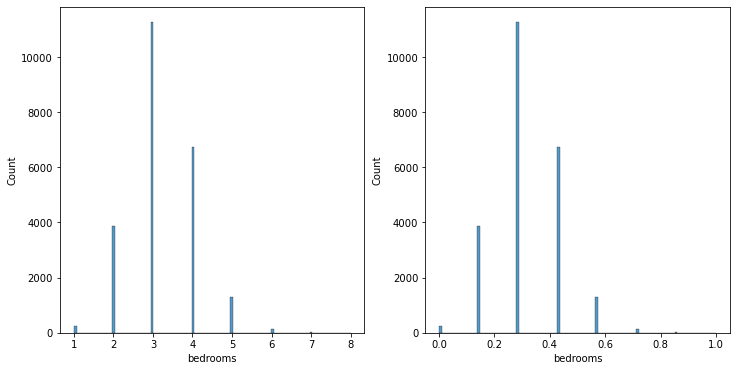

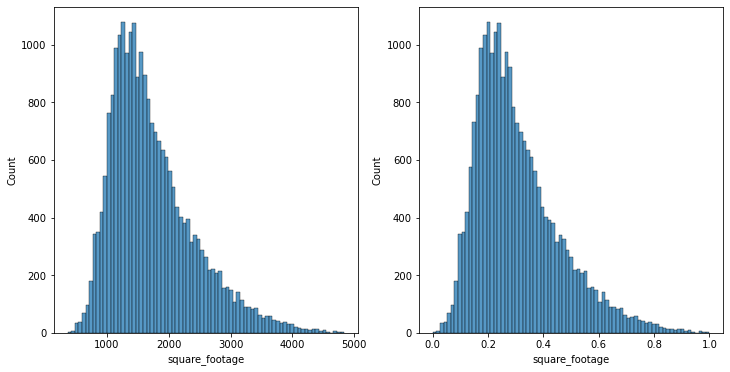

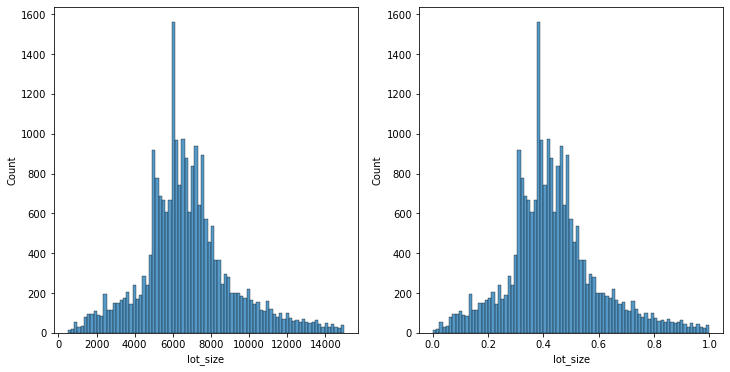

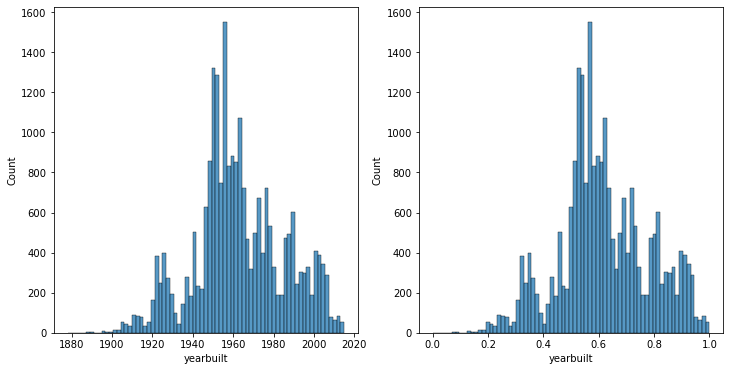

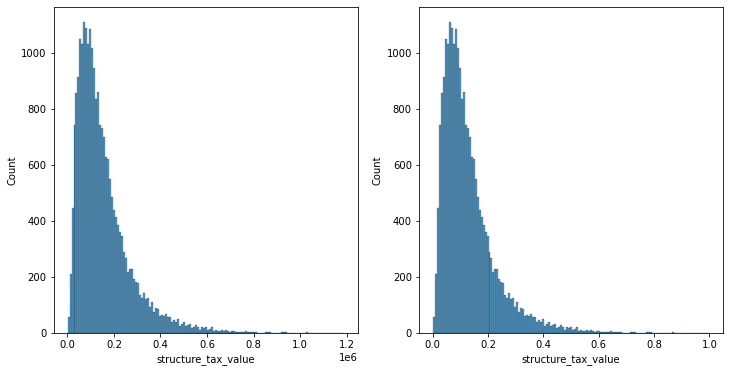

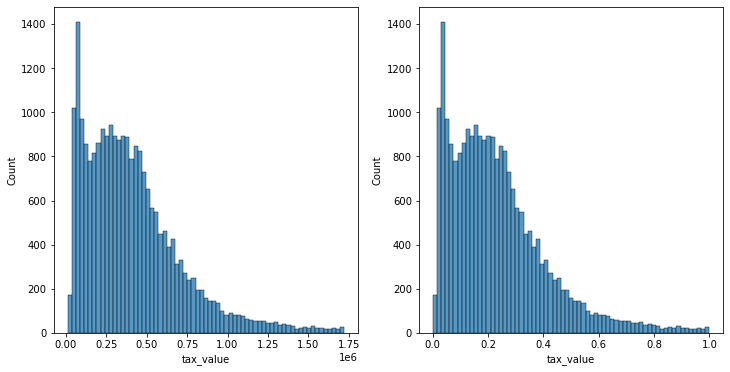

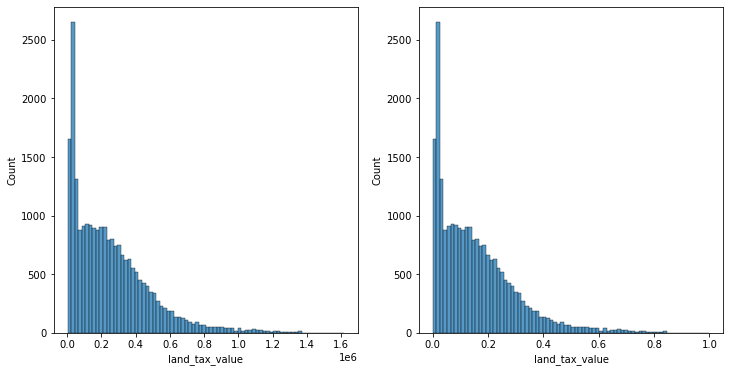

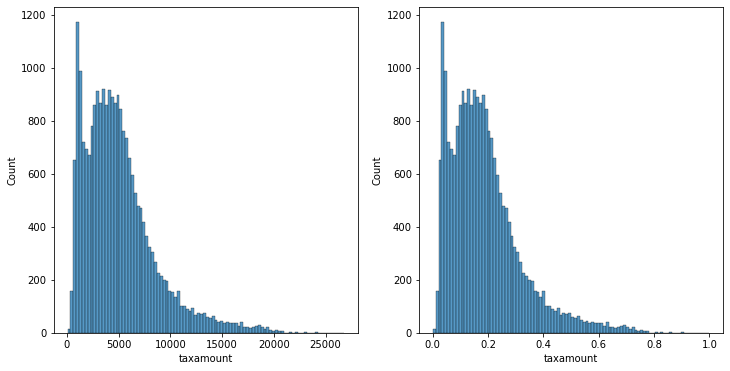

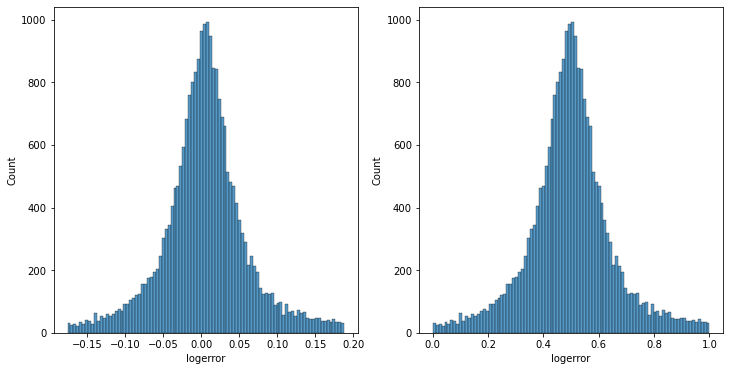

In [10]:
for column in columns_to_scale:
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    sns.histplot(train[column])
    plt.subplot(122)
    sns.histplot(train_scaled[column])
    plt.show()

Data is split and scaled appropriately, I can begin EDA.

# Exploration

My thoughts from before the data analysis.

- I know some of these values are going to be highly correlated to one another, eg. bathroomcnt and calculatedbathroomnbr and fullbathcnt.
- I suspect that larger homes, larger properties and higher taxvaluedollarcnt will be most correlated to the target logerror.
- I'm curious to see if location by lat and long have any effect on home prices or log error.
- There are categorical columns that are encoded as numerical here, as well as discrete numerical columns; I'm curious to see how there might be a relationship in any of these.

Beginning with bivariate visualizations of all continuous variables

In [11]:
# Writing a function that plots pairs of continuous variables to visualize all the potential relationships.
from itertools import combinations

def plot_variable_pairs(df, to_drop = None):
    '''
    This function takes in a dataframe and plots all possible numerical data pairs in scatterplots with a regression 
    line. The function only plots unique combinations of pairs, not permutations, e.g. only prints column a by 
    column b, but leaves out column b by column a. This reduces clutter and runtime.
    
    arguments: df - A dataframe with numerical columns
               to_drop - a list of columns to drop or not include in the plots
    returns: This function returns nothing; it merely plots out the scatterplots
    '''
    
    if to_drop == None:
        columns_to_plot = df.select_dtypes(include = 'number').columns
        plot_tuples = []
        for i in combinations(columns_to_plot,2):
            plot_tuples.append(i)

        for i in plot_tuples:
            sns.lmplot(x = i[0], y = i[1], data = df, line_kws={'color': '#FF5E13', 'linewidth': 3},  height=5, aspect=1.5)
            plt.plot()
            plt.show()
    else:
        columns_to_plot = df.select_dtypes(include = 'number').columns.drop(to_drop)
        plot_tuples = []
        for i in combinations(columns_to_plot,2):
            plot_tuples.append(i)

        for i in plot_tuples:
            sns.lmplot(x = i[0], y = i[1], data = df, line_kws={'color': '#FF5E13', 'linewidth': 3},  height=5, aspect=1.5)
            plt.plot()
            plt.show()

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23595 entries, 35454 to 3321
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   bathrooms                  23595 non-null  float16       
 1   bedrooms                   23595 non-null  uint8         
 2   square_footage             23595 non-null  uint16        
 3   county                     23595 non-null  object        
 4   latitude                   23595 non-null  float64       
 5   longitude                  23595 non-null  float64       
 6   lot_size                   23595 non-null  float64       
 7   propertycountylandusecode  23595 non-null  object        
 8   regionidzip                23595 non-null  float64       
 9   yearbuilt                  23595 non-null  uint16        
 10  structure_tax_value        23595 non-null  float64       
 11  tax_value                  23595 non-null  float64       
 12  l

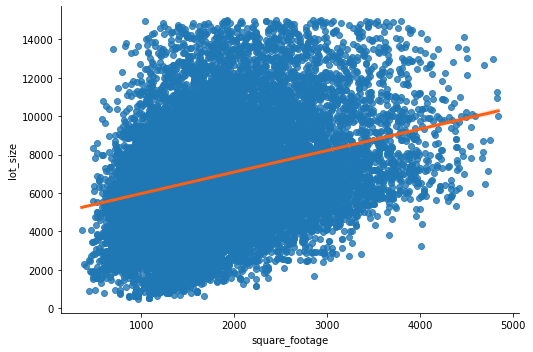

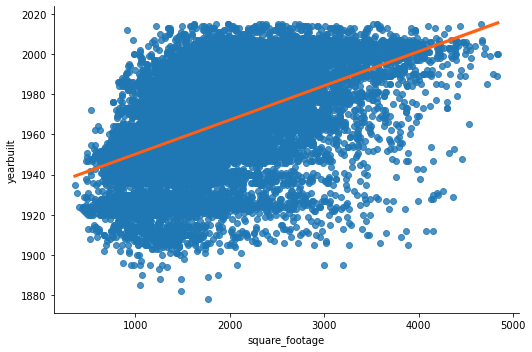

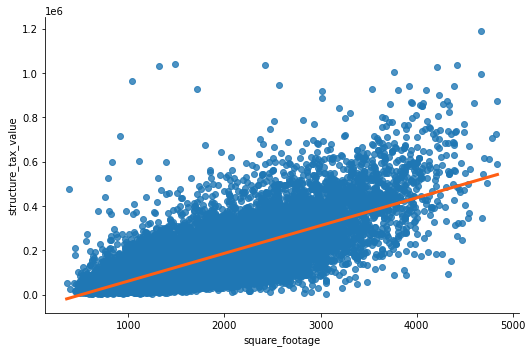

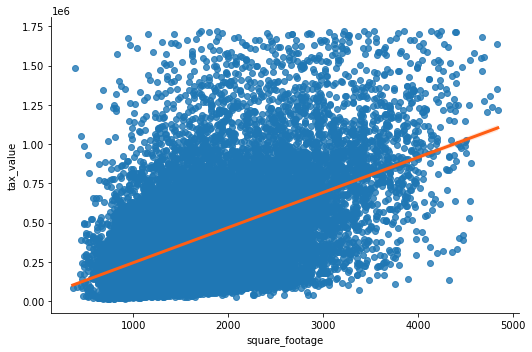

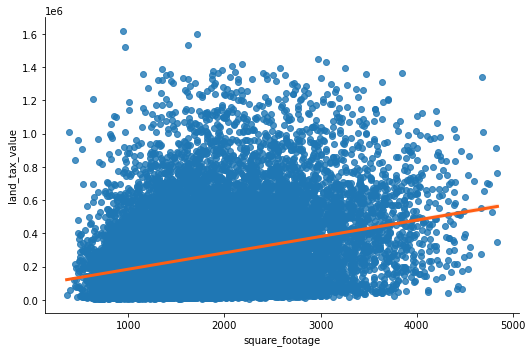

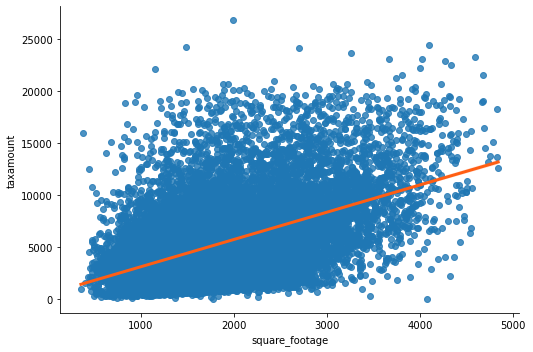

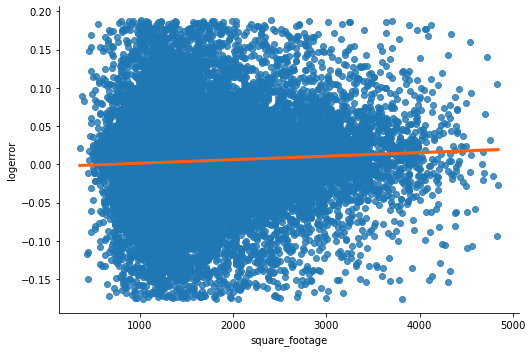

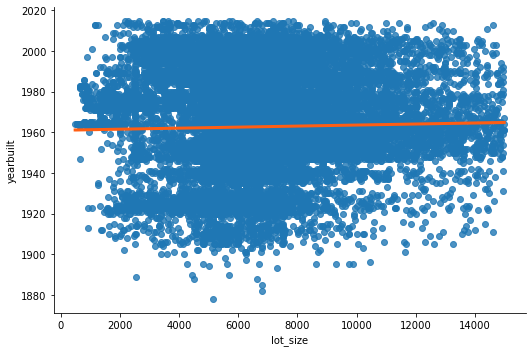

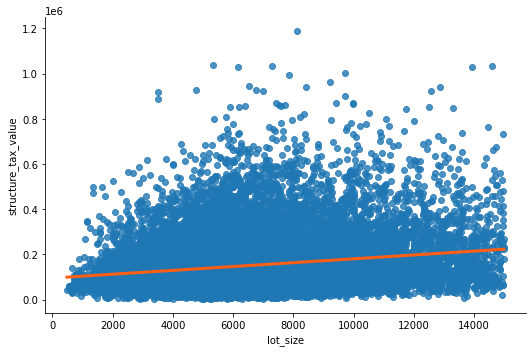

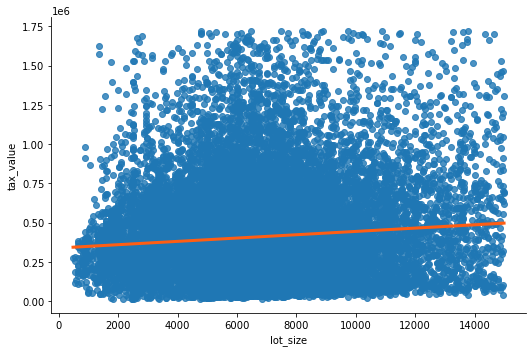

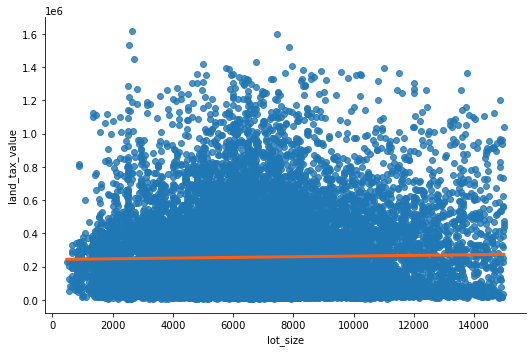

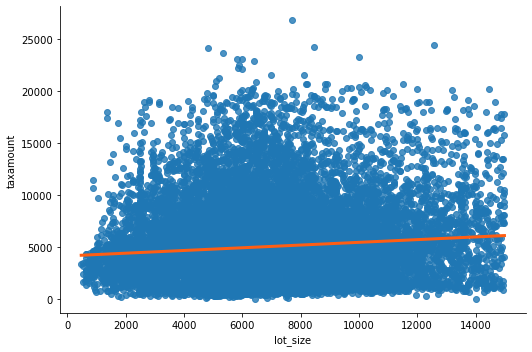

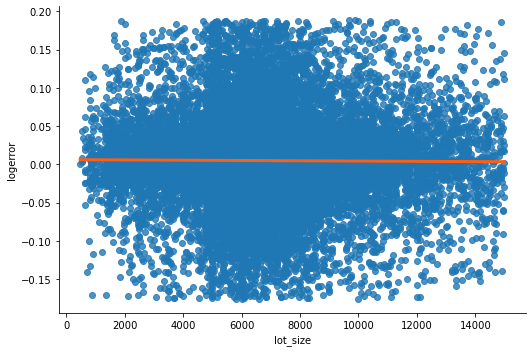

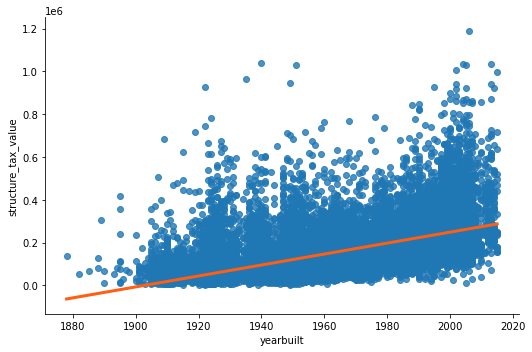

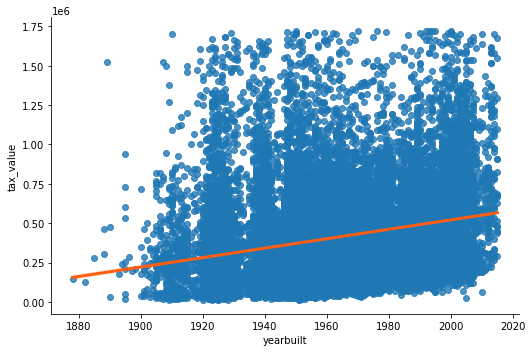

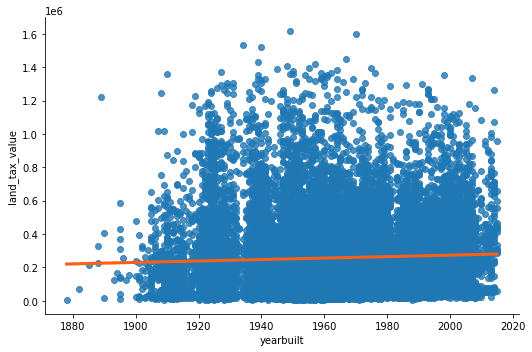

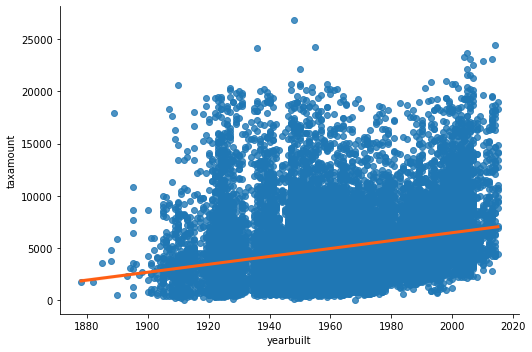

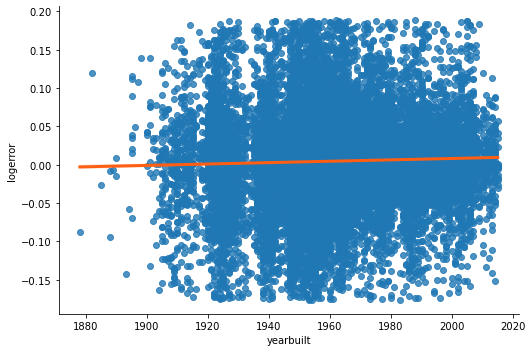

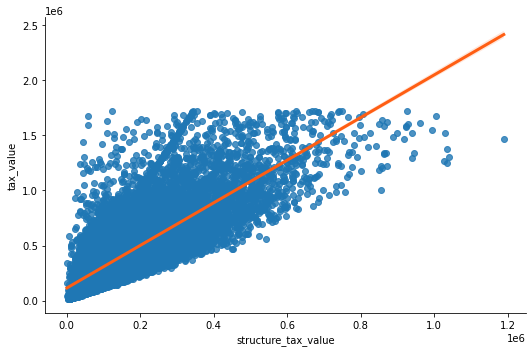

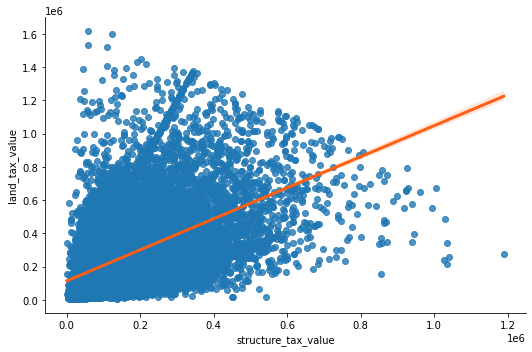

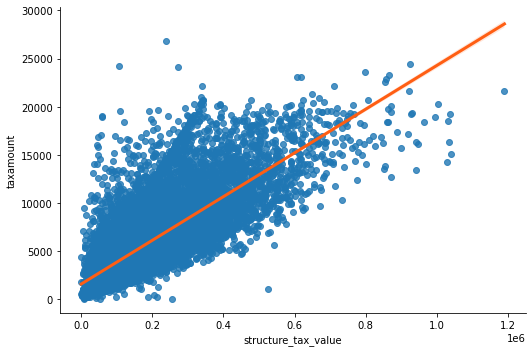

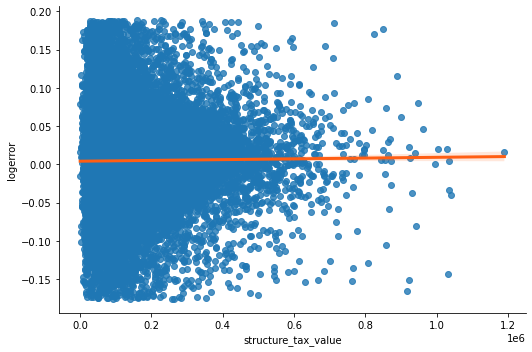

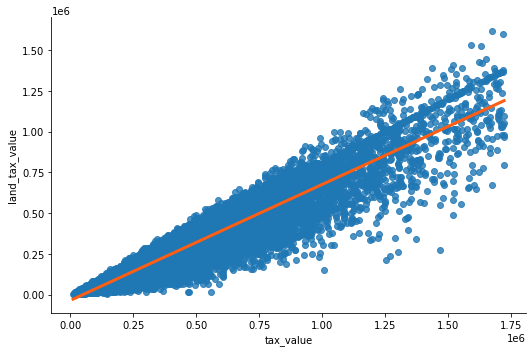

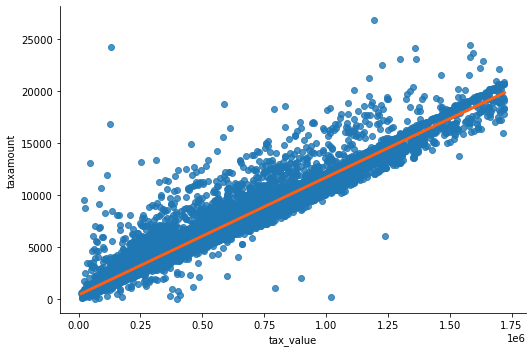

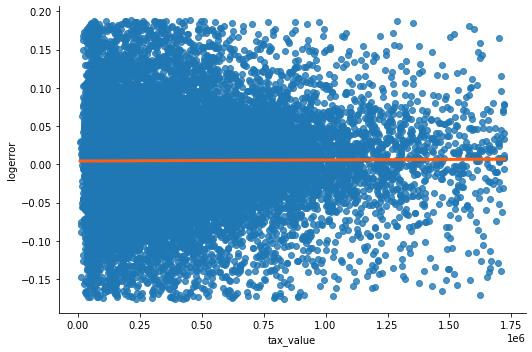

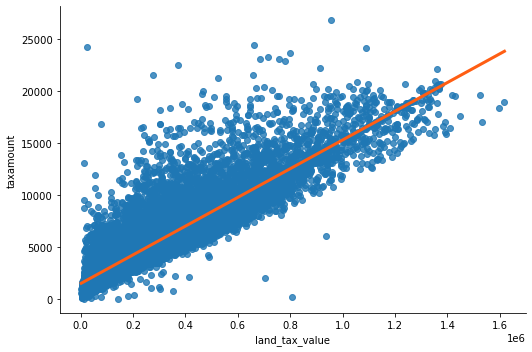

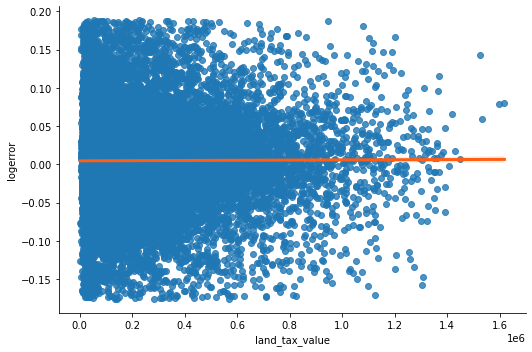

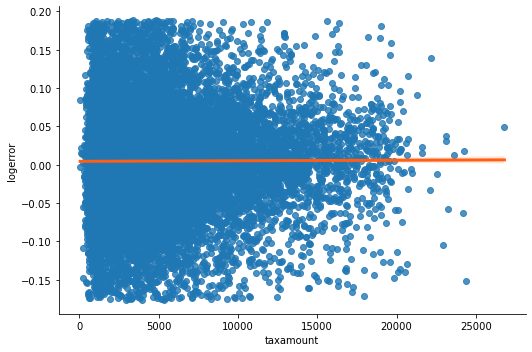

In [13]:
# Just going to plot actual continuous variables not numerical/discrete data
plot_variable_pairs(train, to_drop = ['bathrooms','bedrooms','latitude','longitude',
                                     'regionidzip'])

Now I want to isolate the correlations on the with the target alone to see what it looks like.

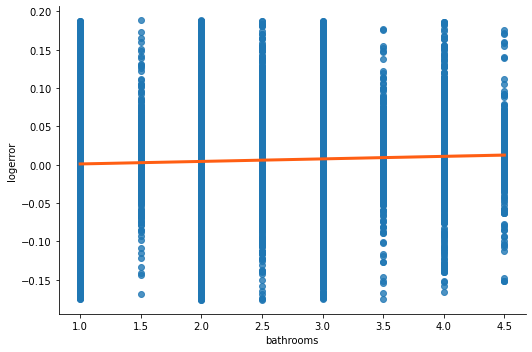

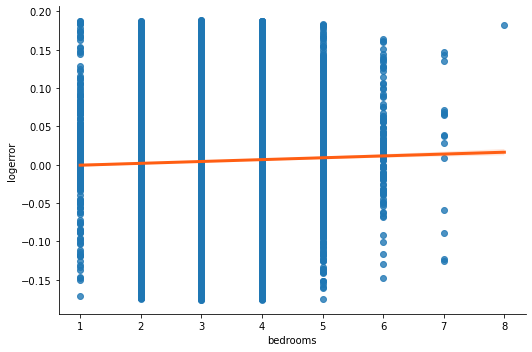

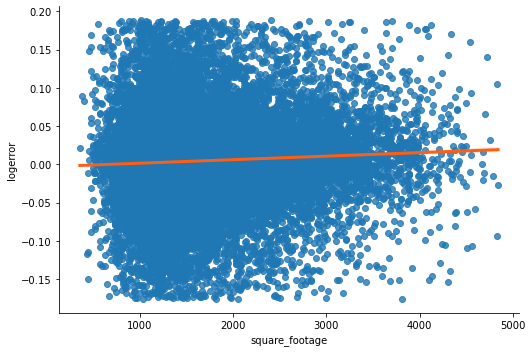

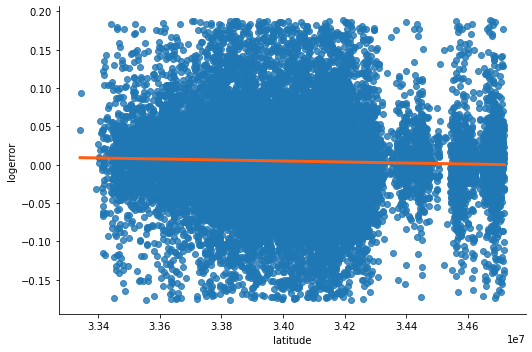

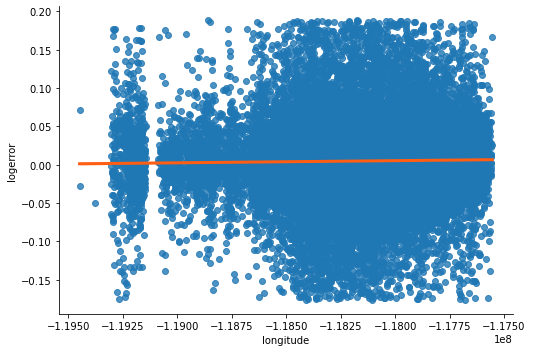

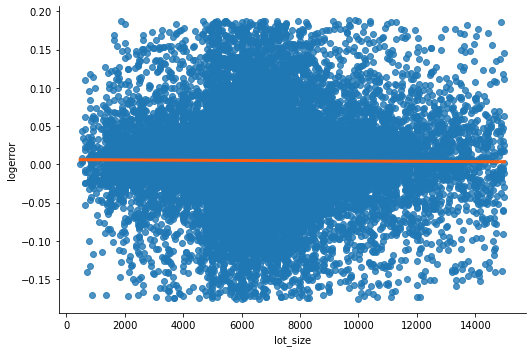

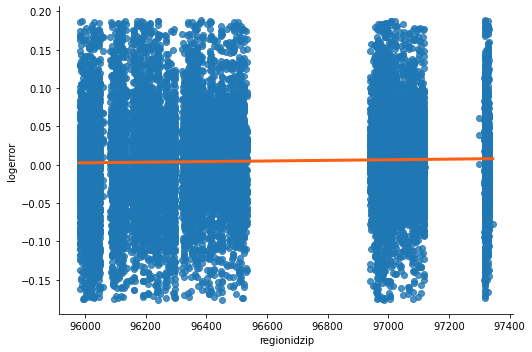

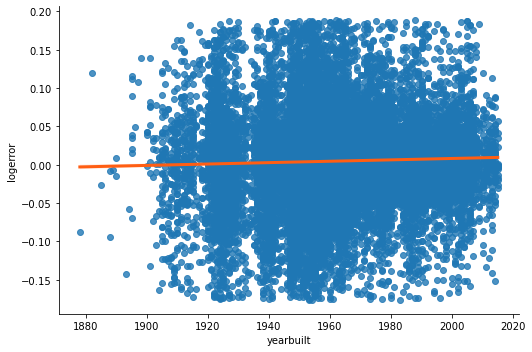

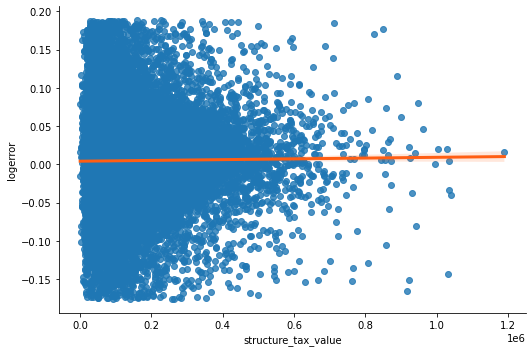

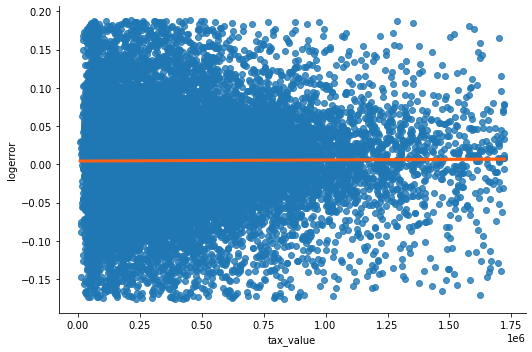

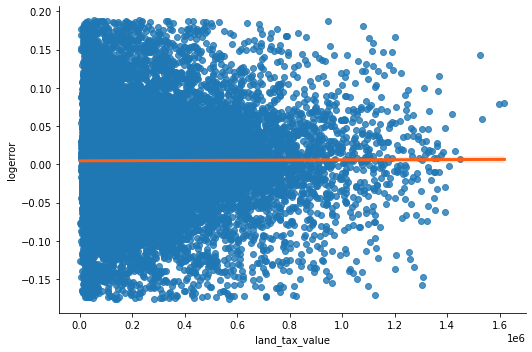

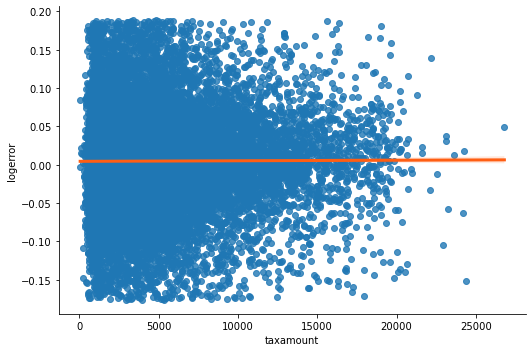

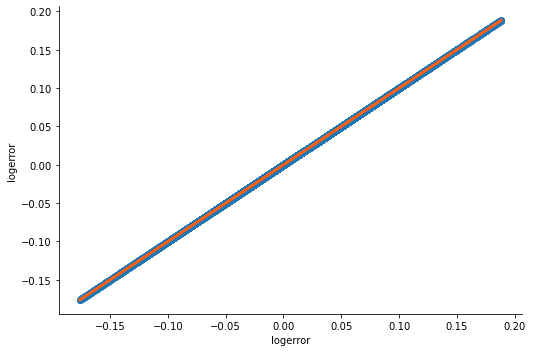

In [14]:
for column in train.select_dtypes(include = 'number').columns:
    sns.lmplot(x = column, y = 'logerror', data = train, line_kws={'color': '#FF5E13', 'linewidth': 3},  height=5, aspect=1.5)

In [15]:
#Looking at the homes wiith the largest log error
train[train.logerror > (train.logerror.max()*.9)].sort_values('logerror')

bathrooms  bedrooms  square_footage       county    latitude  \
17972        2.0         3            1976  los_angeles  33831425.0   
51297        1.0         2            1228  los_angeles  34068069.0   
51788        2.0         4            2298  los_angeles  34173237.0   
47626        2.0         2            1636  los_angeles  34142931.0   
40574        2.0         4            1864      ventura  34227256.0   
...          ...       ...             ...          ...         ...   
50034        2.0         4            1381       orange  33839214.0   
29789        1.0         1            1064  los_angeles  33849616.0   
2996         2.0         4            1681  los_angeles  34014621.0   
37510        1.5         3            1016      ventura  34195133.0   
12052        2.0         3            2411  los_angeles  34671797.0   

         longitude  lot_size propertycountylandusecode  regionidzip  \
17972 -118364838.0    5603.0                      0100      96161.0   
51297 -118361417.0    5422.0                      0100      96029.0   
51788 -118586733.0    8387.0                      0101      96389.0   
47626 -118627811.0    6210.0                      0100      96337.0   
40574 -119044607.0    7528.0                      1111      97089.0   
...            ...       ...                       ...          ...   
50034 -117972496.0    7923.0                       122      97020.0   
29789 -118170556.0    5481.0                      0100      96241.0   
2996  -118337060.0    6143.0                      0100      95989.0   
37510 -118860249.0    9892.0                      1111      96383.0   
12052 -118176430.0    9687.0                      0101      97319.0   

       yearbuilt  structure_tax_value  tax_value  land_tax_value  taxamount  \
17972       1955             204455.0   789119.0        584664.0    9007.77   
51297       1926             150043.0   311093.0        161050.0    3801.32   
51788       1960             191202.0   306153.0        114951.0    3924.78   
47626       1929             171234.0   392716.0        221482.0    4633.04   
40574       1967              62476.0    81064.0         18588.0     875.68   
...          ...                  ...        ...             ...        ...   
50034       1958              86503.0   263603.0        177100.0    3245.02   
29789       1942              82000.0   410000.0        328000.0    4990.63   
2996        1942              35598.0    68087.0         32489.0    1019.18   
37510       1962             226335.0   452670.0        226335.0    4848.08   
12052       1988             160397.0   213933.0         53536.0    3358.15   

       logerror transactiondate  
17972  0.169507      2017-04-17  
51297  0.169555      2017-09-13  
51788  0.169639      2017-09-15  
47626  0.169701      2017-08-25  
40574  0.169763      2017-07-25  
...         ...             ...  
50034  0.187886      2017-09-06  
29789  0.187908      2017-06-07  
2996   0.187955      2017-01-20  
37510  0.188178      2017-07-10  
12052  0.188233      2017-03-17  

[172 rows x 16 columns]

I need to explore this more in clustering

Exploring correlations now.

<AxesSubplot:>

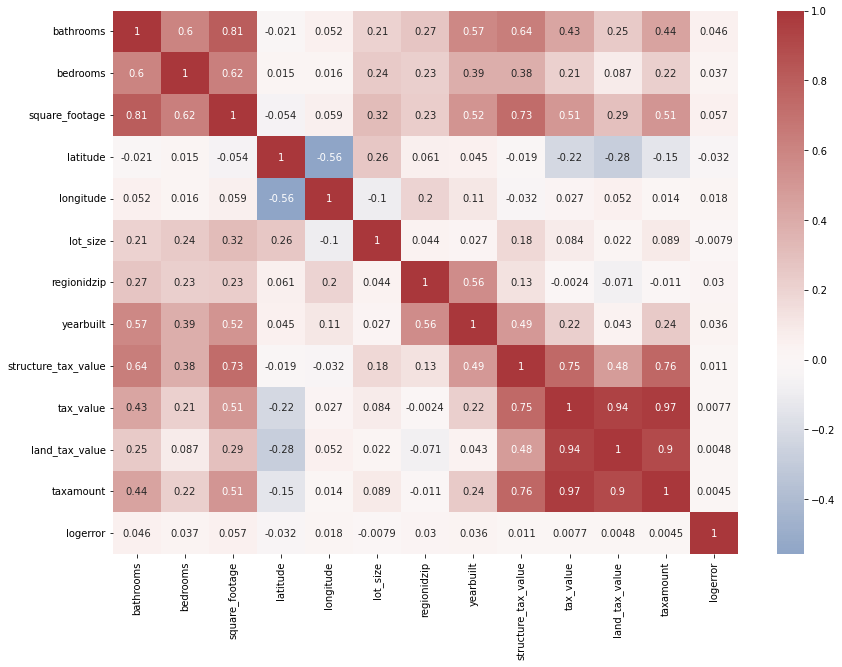

In [16]:
plt.figure(figsize=(14,10))
sns.heatmap(data=train.corr(), annot=True, cmap = "vlag", center = 0)

**Takeaways:** 
- Nothing correlates highly to logerror
- calculatedbathnbr, bathroomcnt, and fullbathcnt are essentially all the same thing, I can rewrite wrangle_zillow.py to drop 2 of the 3. I will retain bathroomcnt and drop the other two. (When running in the future, I've already dropped these in the wrangle_zillow.py file so they won't show up here.)
- taxvaluedollarcnt, taxamount and landtaxvaluedollarcnt are all highly correlated to one another.

In [17]:
 # Writing a function that plots continuous variables with categoricals separated out to visualize all the potential relationships.

def plot_categorical_and_continuous_vars(df, continuous, categorical):
    '''
    This function takes in a dataframe, a list of continuous variables, and a list of categorical variables and does 
    3 plots for each unique combination of categorical and continuous variable.
    
    Arguments: df - a dataframe consisting of continuous and categorical columns
    '''
    plot_list = []
    for cat in categorical:
        for cont in continuous:
            plot_list.append([cat, cont])
    
    for i in plot_list:
        plt.figure(figsize=(18, 5))
        plt.subplot(131)
        sns.boxplot(x=i[0], y=i[1], data=df)
        plt.subplot(132)
        sns.stripplot(x=i[0], y=i[1], data=df)
        plt.subplot(133)
        sns.violinplot(x=i[0], y=i[1], data=df)
#         sns.barplot(x=i[0], y=i[1], data=df)
        plt.show()

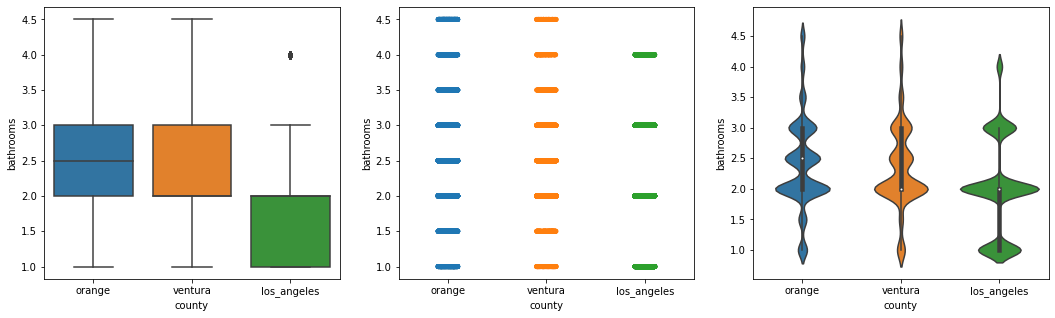

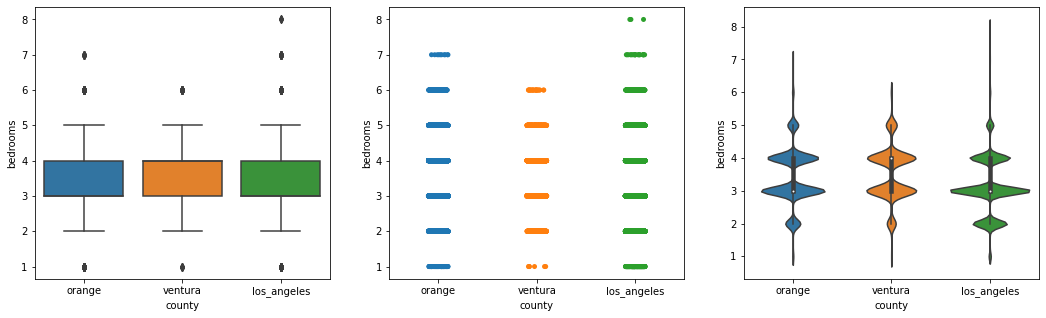

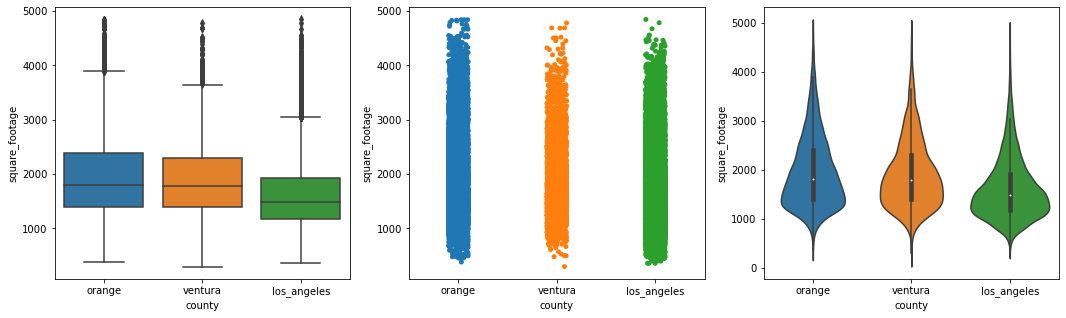

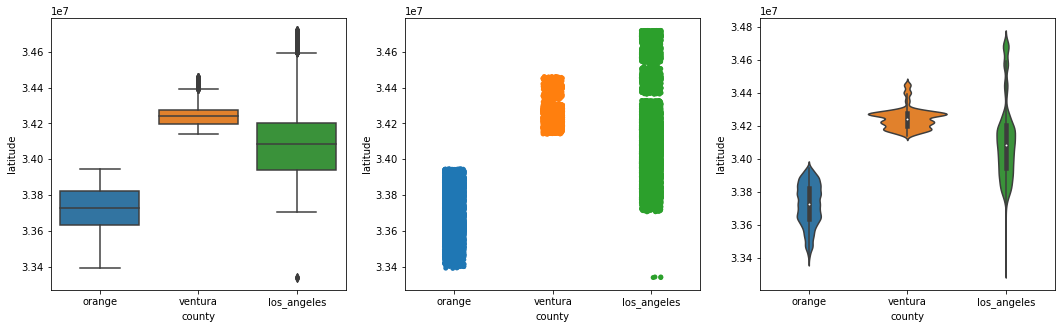

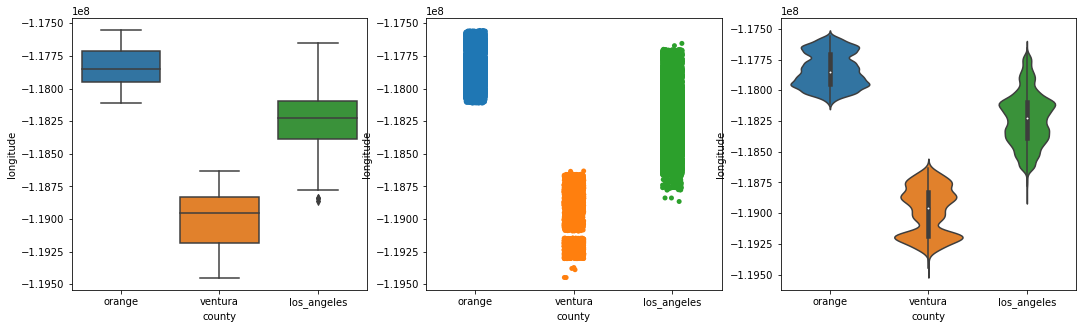

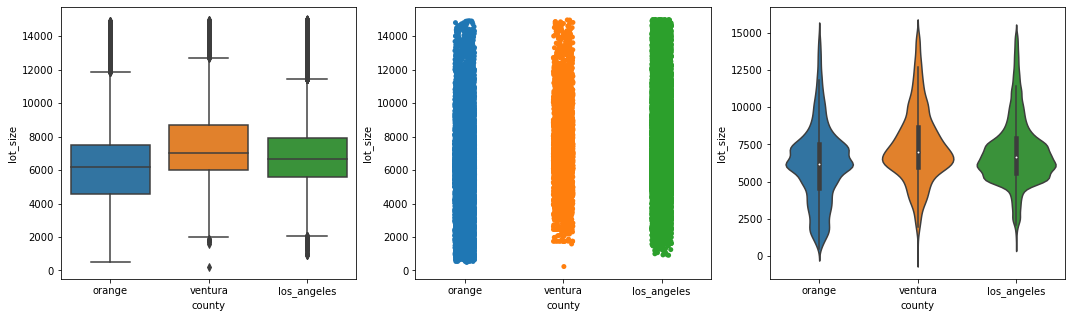

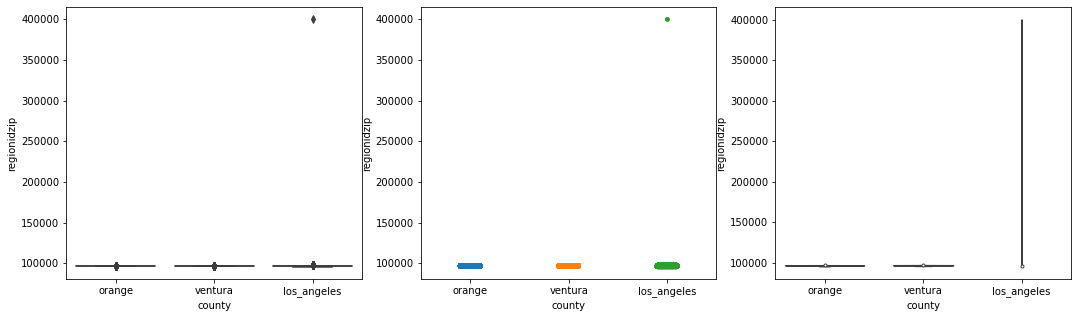

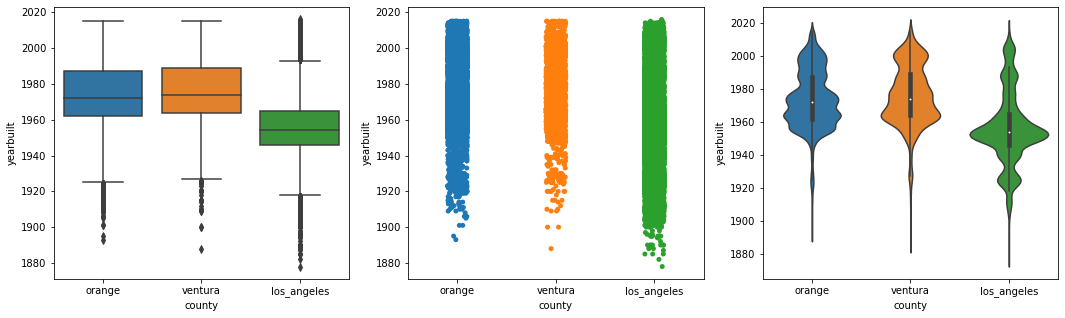

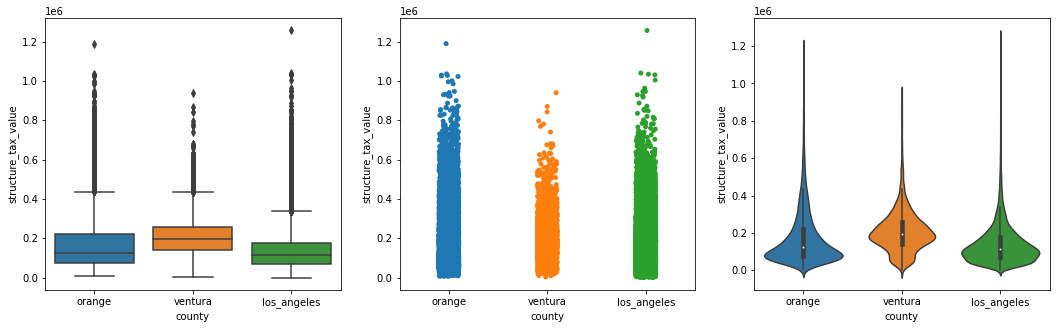

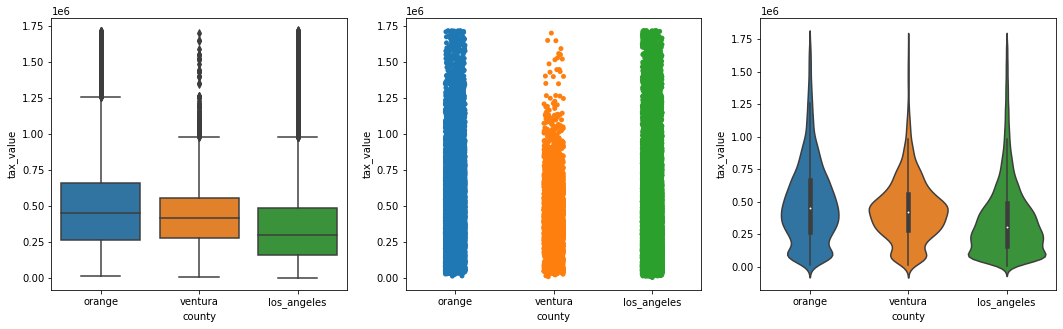

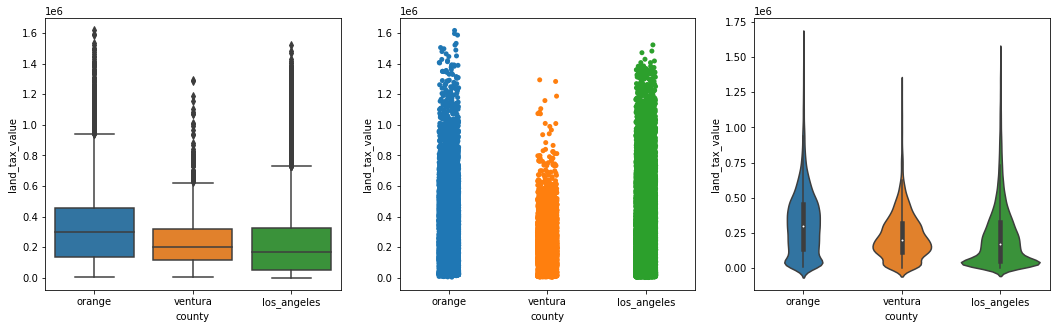

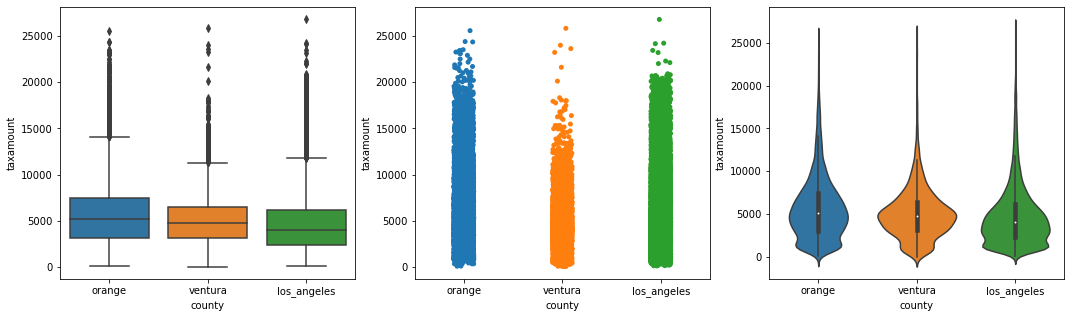

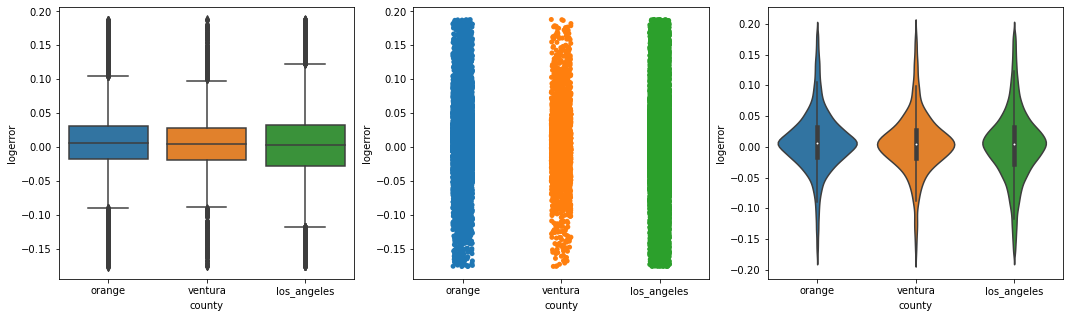

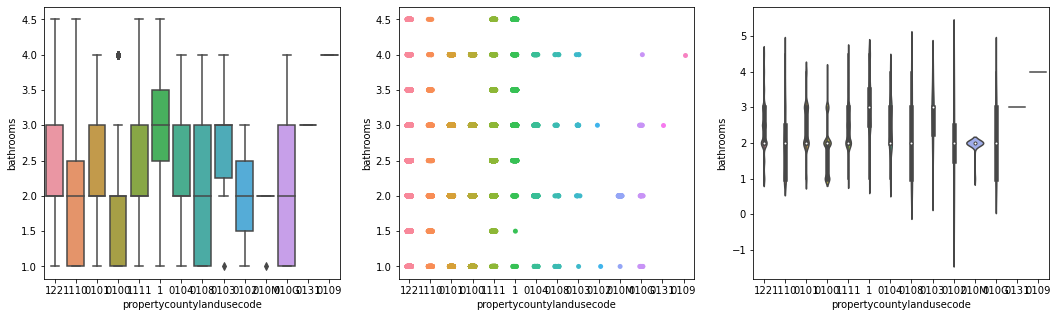

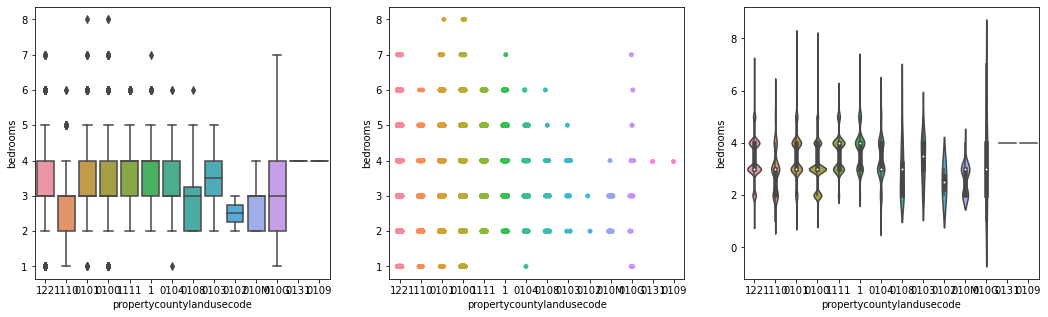

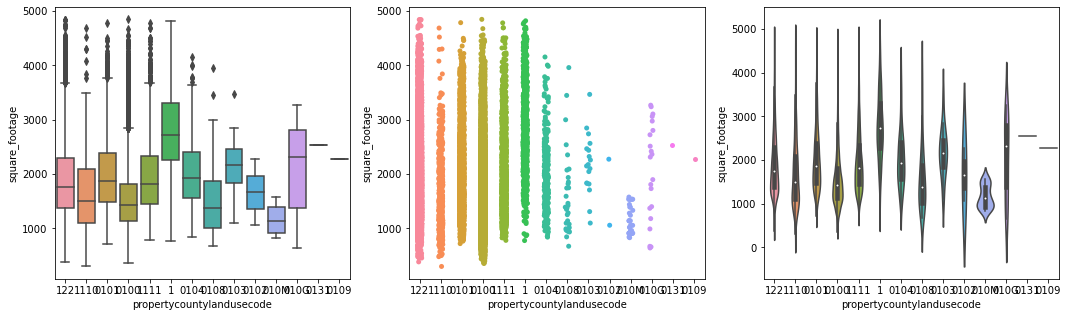

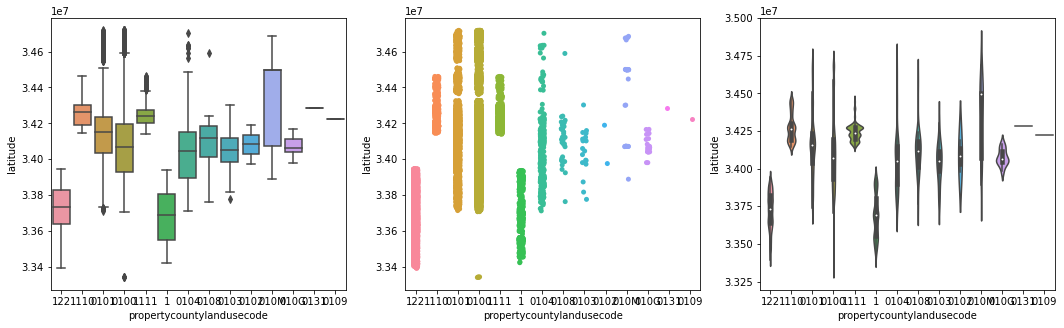

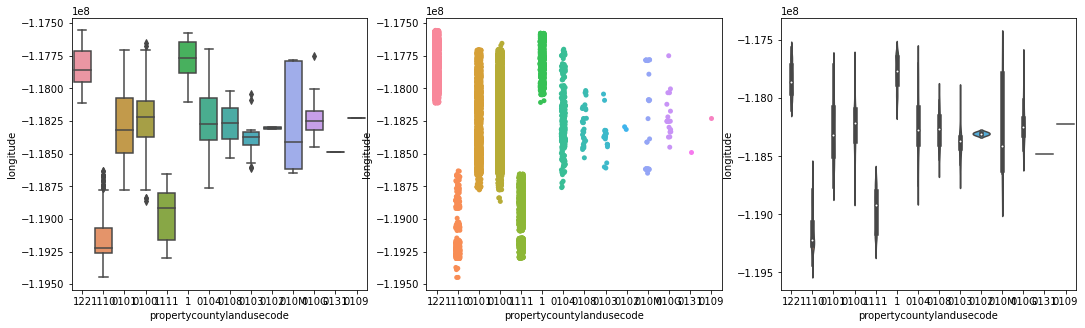

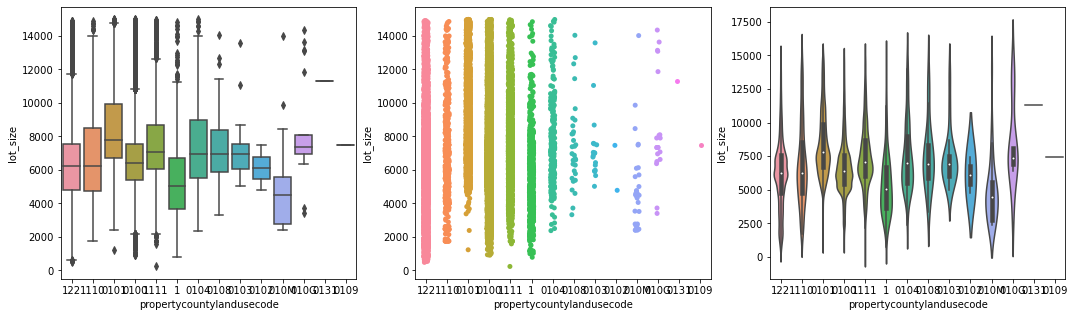

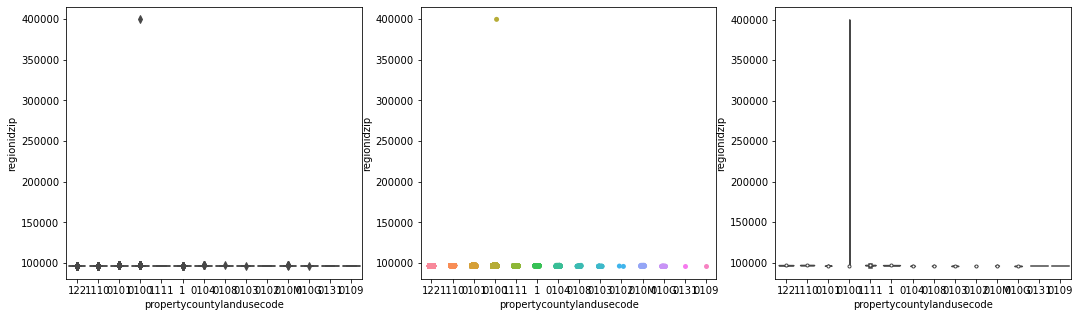

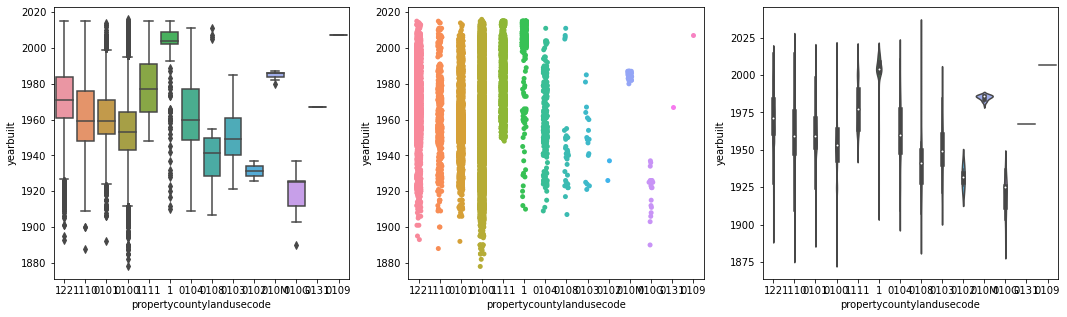

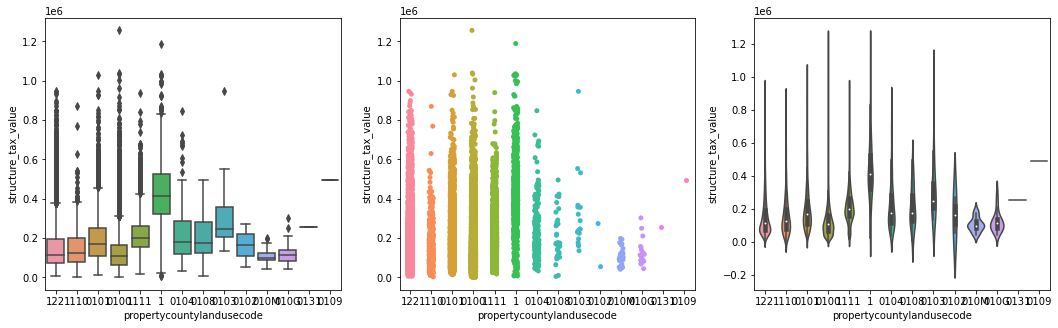

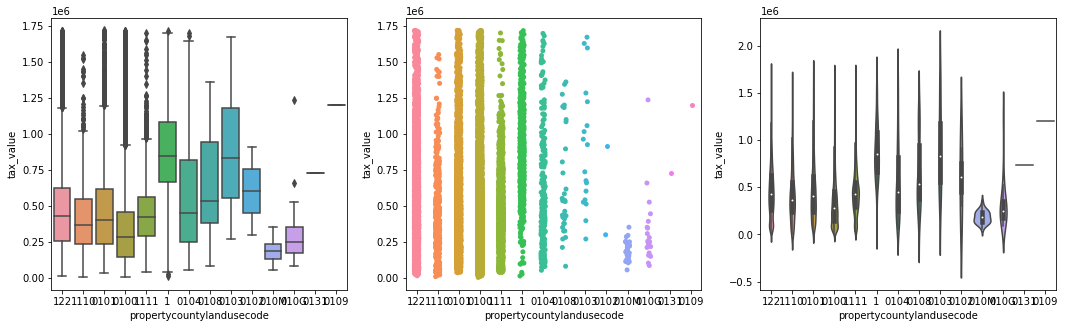

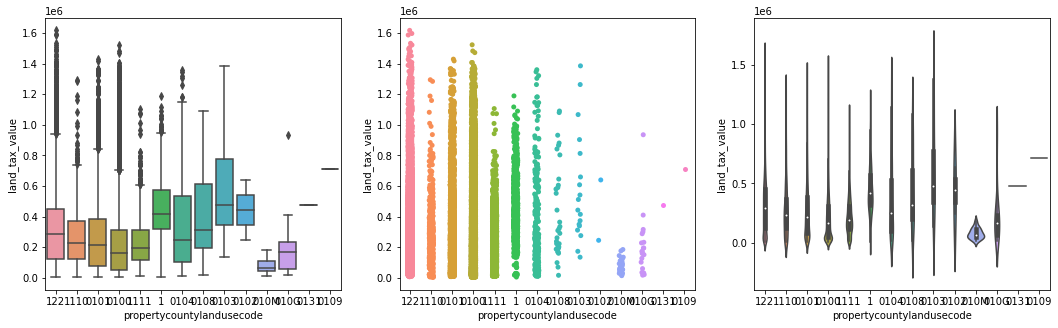

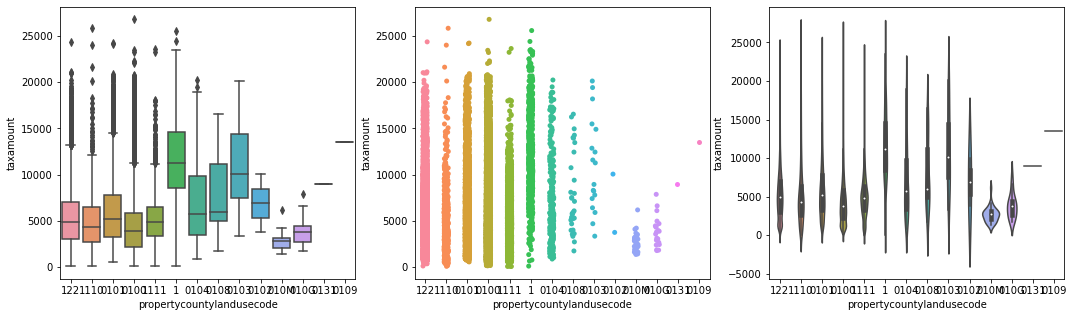

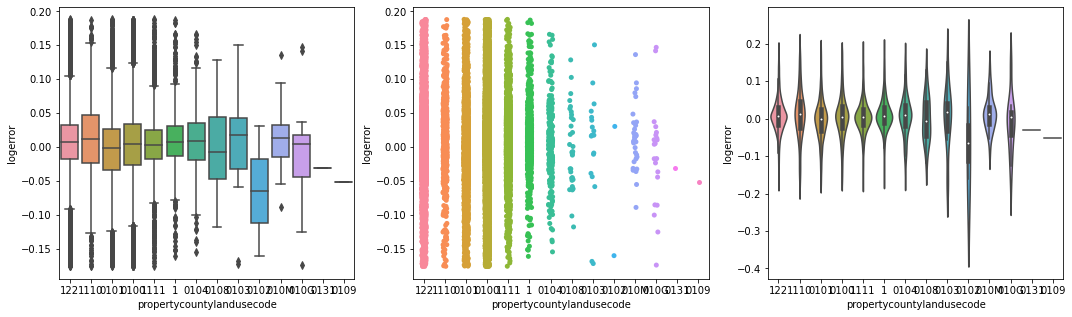

In [18]:
plot_categorical_and_continuous_vars(df, df.select_dtypes('number'), df.select_dtypes('object'))

Other notes: 

<AxesSubplot:xlabel='logerror', ylabel='Count'>

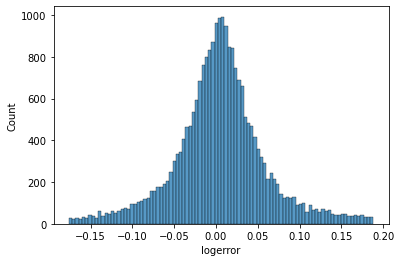

In [19]:
sns.histplot(data=train, x='logerror')

**Feature Engineering:** Going to create some synthetic features and then rerun these visualizations using those against the target to see how they perform.

- Time of year: split into 4 month blocks - Jan-Apr, May-Aug, Sept-Dec
- Time of year: seasons - Winter, Spring, Summer, Fall
- Day of week: split into days of week and see how it affects things
- Home price per square foot: structure_tax_value / square_footage
- Land price per square foot: land_tax_value / lot_size
- Yearbuilt scaled / taxamount scaled

In [20]:
# Writing a function to determine the sale time in 4 month blocks.

def four_month_split(df):
    if (df['transactiondate'] >= pd.to_datetime('2017-01-01')) and (df['transactiondate'] <  pd.to_datetime('2017-05-01')):
        return 'jan_apr'
    elif (df['transactiondate'] >= pd.to_datetime('2017-05-01')) and (df['transactiondate'] < pd.to_datetime('2017-09-01')):
        return 'may_aug'
    else:
        return 'sept_dec'
    
# Writing a function to determine the sale time in Seasons.
def season(df):
    if (df['transactiondate'] >= pd.to_datetime('2017-01-01')) and (df['transactiondate'] < pd.to_datetime('2017-03-01')) \
        or (df['transactiondate']>= pd.to_datetime('2017-12-01')):
        return 'winter'
    elif (df['transactiondate'] >= pd.to_datetime('2017-03-01')) and (df['transactiondate'] < pd.to_datetime('2017-06-01')):
        return 'spring'
    elif (df['transactiondate'] >= pd.to_datetime('2017-06-01')) and (df['transactiondate'] < pd.to_datetime('2017-09-01')):
        return 'summer'
    else:
        return 'fall' 

In [21]:
train['four_month_range'] = train.apply(four_month_split,axis=1)

In [22]:
train['season'] = train.apply(season,axis=1)

In [23]:
train[(train.transactiondate < '2017-06-01') & (train.transactiondate > '2017-04-30')].transactiondate.value_counts()

2017-05-31    235
2017-05-26    224
2017-05-19    218
2017-05-05    205
2017-05-12    179
2017-05-25    175
2017-05-09    161
2017-05-23    159
2017-05-24    149
2017-05-11    139
2017-05-16    131
2017-05-02    126
2017-05-01    125
2017-05-10    122
2017-05-18    117
2017-05-04    116
2017-05-08    116
2017-05-30    108
2017-05-03    106
2017-05-22    102
2017-05-17    101
2017-05-15     99
2017-05-29      4
2017-05-14      3
2017-05-21      2
2017-05-27      2
2017-05-28      2
2017-05-13      1
2017-05-06      1
Name: transactiondate, dtype: int64

<AxesSubplot:xlabel='transactiondate', ylabel='Count'>

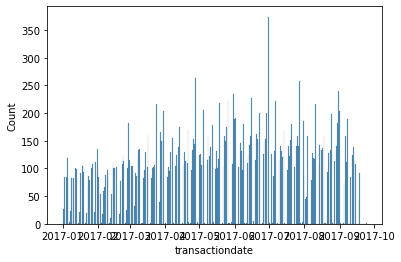

In [24]:
sns.histplot(data = train, x = 'transactiondate', bins =365)

In [25]:
train['day_of_week'] = train.transactiondate.dt.day_of_week

In [26]:
def map_days(df):
    # identified counties for fips codes 
    counties = {0: 'monday',
                1: 'tuesday',
                2: 'wednesday',
                3: 'thursday',
                4: 'friday',
                5: 'saturday',
                6: 'sunday'}
    # map counties to fips codes
    df.day_of_week = df.day_of_week.map(counties)
    return df

In [27]:
train = map_days(train)

In [28]:
train.head()

bathrooms  bedrooms  square_footage       county    latitude  \
35454        3.0         5            3014  los_angeles  34634772.0   
3249         1.0         3            1192  los_angeles  33869289.0   
40108        2.0         3            1589      ventura  34186509.0   
8842         2.0         3            1893  los_angeles  34078574.0   
15343        1.0         3            1116  los_angeles  33741754.0   

         longitude  lot_size propertycountylandusecode  regionidzip  \
35454 -118223018.0   13099.0                      0101      97329.0   
3249  -118392007.0    4146.0                      0100      96109.0   
40108 -118938855.0   10500.0                      1111      96351.0   
8842  -118368362.0    6352.0                      0101      96029.0   
15343 -118300309.0    4994.0                      0100      96221.0   

       yearbuilt  structure_tax_value  tax_value  land_tax_value  taxamount  \
35454       2000             275543.0   344453.0         68910.0    4970.42   
3249        1951              79980.0   399937.0        319957.0    4560.80   
40108       1964             156181.0   260296.0        104115.0    2768.22   
8842        1927             389747.0  1679968.0       1290221.0   20157.68   
15343       1955              84740.0   153030.0         68290.0    2021.20   

       logerror transactiondate four_month_range  season day_of_week  
35454 -0.004393      2017-06-30          may_aug  summer      friday  
3249  -0.053424      2017-01-23          jan_apr  winter      monday  
40108  0.029549      2017-07-21          may_aug  summer      friday  
8842   0.033177      2017-02-28          jan_apr  winter     tuesday  
15343  0.032236      2017-04-03          jan_apr  spring      monday

In [29]:
# Home price per square foot: structure_tax_value / square_footage
train['home_price_per_sq_ft'] = train.structure_tax_value / train.square_footage
train.head()

bathrooms  bedrooms  square_footage       county    latitude  \
35454        3.0         5            3014  los_angeles  34634772.0   
3249         1.0         3            1192  los_angeles  33869289.0   
40108        2.0         3            1589      ventura  34186509.0   
8842         2.0         3            1893  los_angeles  34078574.0   
15343        1.0         3            1116  los_angeles  33741754.0   

         longitude  lot_size propertycountylandusecode  regionidzip  \
35454 -118223018.0   13099.0                      0101      97329.0   
3249  -118392007.0    4146.0                      0100      96109.0   
40108 -118938855.0   10500.0                      1111      96351.0   
8842  -118368362.0    6352.0                      0101      96029.0   
15343 -118300309.0    4994.0                      0100      96221.0   

       yearbuilt  structure_tax_value  tax_value  land_tax_value  taxamount  \
35454       2000             275543.0   344453.0         68910.0    4970.42   
3249        1951              79980.0   399937.0        319957.0    4560.80   
40108       1964             156181.0   260296.0        104115.0    2768.22   
8842        1927             389747.0  1679968.0       1290221.0   20157.68   
15343       1955              84740.0   153030.0         68290.0    2021.20   

       logerror transactiondate four_month_range  season day_of_week  \
35454 -0.004393      2017-06-30          may_aug  summer      friday   
3249  -0.053424      2017-01-23          jan_apr  winter      monday   
40108  0.029549      2017-07-21          may_aug  summer      friday   
8842   0.033177      2017-02-28          jan_apr  winter     tuesday   
15343  0.032236      2017-04-03          jan_apr  spring      monday   

       home_price_per_sq_ft  
35454             91.421035  
3249              67.097315  
40108             98.288861  
8842             205.888537  
15343             75.931900

In [30]:
# Land price per lot size: land_tax_value / lot_size
train['land_price_per_lot_sq_ft'] = train.land_tax_value / train.lot_size
train.head()

bathrooms  bedrooms  square_footage       county    latitude  \
35454        3.0         5            3014  los_angeles  34634772.0   
3249         1.0         3            1192  los_angeles  33869289.0   
40108        2.0         3            1589      ventura  34186509.0   
8842         2.0         3            1893  los_angeles  34078574.0   
15343        1.0         3            1116  los_angeles  33741754.0   

         longitude  lot_size propertycountylandusecode  regionidzip  \
35454 -118223018.0   13099.0                      0101      97329.0   
3249  -118392007.0    4146.0                      0100      96109.0   
40108 -118938855.0   10500.0                      1111      96351.0   
8842  -118368362.0    6352.0                      0101      96029.0   
15343 -118300309.0    4994.0                      0100      96221.0   

       yearbuilt  ...  tax_value  land_tax_value  taxamount  logerror  \
35454       2000  ...   344453.0         68910.0    4970.42 -0.004393   
3249        1951  ...   399937.0        319957.0    4560.80 -0.053424   
40108       1964  ...   260296.0        104115.0    2768.22  0.029549   
8842        1927  ...  1679968.0       1290221.0   20157.68  0.033177   
15343       1955  ...   153030.0         68290.0    2021.20  0.032236   

       transactiondate four_month_range  season day_of_week  \
35454       2017-06-30          may_aug  summer      friday   
3249        2017-01-23          jan_apr  winter      monday   
40108       2017-07-21          may_aug  summer      friday   
8842        2017-02-28          jan_apr  winter     tuesday   
15343       2017-04-03          jan_apr  spring      monday   

      home_price_per_sq_ft  land_price_per_lot_sq_ft  
35454            91.421035                  5.260707  
3249             67.097315                 77.172455  
40108            98.288861                  9.915714  
8842            205.888537                203.120435  
15343            75.931900                 13.674409  

[5 rows x 21 columns]

In [31]:
# Yearbuilt scaled / taxamount scaled
train['scaledyear_to_scaledtax'] = train_scaled.yearbuilt / train_scaled.taxamount

In [32]:
train.head()

bathrooms  bedrooms  square_footage       county    latitude  \
35454        3.0         5            3014  los_angeles  34634772.0   
3249         1.0         3            1192  los_angeles  33869289.0   
40108        2.0         3            1589      ventura  34186509.0   
8842         2.0         3            1893  los_angeles  34078574.0   
15343        1.0         3            1116  los_angeles  33741754.0   

         longitude  lot_size propertycountylandusecode  regionidzip  \
35454 -118223018.0   13099.0                      0101      97329.0   
3249  -118392007.0    4146.0                      0100      96109.0   
40108 -118938855.0   10500.0                      1111      96351.0   
8842  -118368362.0    6352.0                      0101      96029.0   
15343 -118300309.0    4994.0                      0100      96221.0   

       yearbuilt  ...  land_tax_value  taxamount  logerror  transactiondate  \
35454       2000  ...         68910.0    4970.42 -0.004393       2017-06-30   
3249        1951  ...        319957.0    4560.80 -0.053424       2017-01-23   
40108       1964  ...        104115.0    2768.22  0.029549       2017-07-21   
8842        1927  ...       1290221.0   20157.68  0.033177       2017-02-28   
15343       1955  ...         68290.0    2021.20  0.032236       2017-04-03   

       four_month_range  season day_of_week home_price_per_sq_ft  \
35454           may_aug  summer      friday            91.421035   
3249            jan_apr  winter      monday            67.097315   
40108           may_aug  summer      friday            98.288861   
8842            jan_apr  winter     tuesday           205.888537   
15343           jan_apr  spring      monday            75.931900   

      land_price_per_lot_sq_ft  scaledyear_to_scaledtax  
35454                 5.260707                 4.842685  
3249                 77.172455                 3.160880  
40108                 9.915714                 6.180627  
8842                203.120435                 0.475859  
15343                13.674409                 7.632294  

[5 rows x 22 columns]

In [33]:
new_columns = ['four_month_range', 'season', 'day_of_week', 'home_price_per_sq_ft', 'land_price_per_lot_sq_ft', 'scaledyear_to_scaledtax']

Exploring new columns histograms.

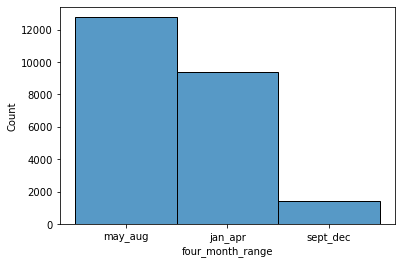

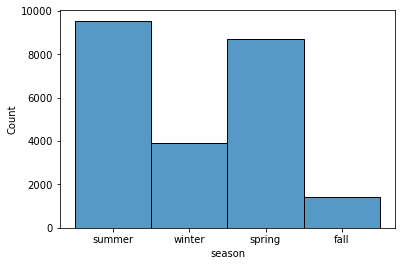

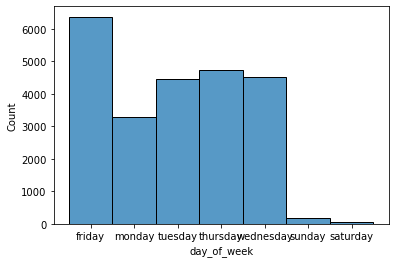

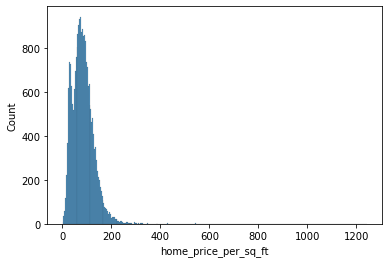

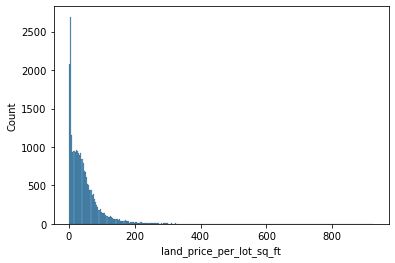

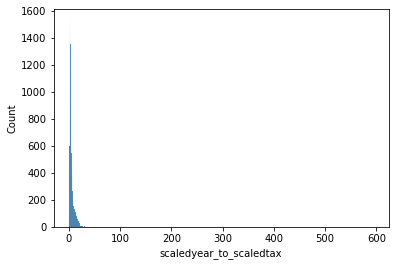

In [34]:
for column in new_columns:
    sns.histplot(data = train, x = column)
    plt.show()

### Takeaways:

- Most homes sold on Friday, nearly none sold on sat/sun.
- Most homes sold in first 2/3 of the year
- Home price per sq ft is pretty normally distributed.
- Land price per lot size has right skew
- Unsure if scaledyear to scaledtax is valuable or not.

I'm going to encode the day of weekand season to see allow me to plot these better and possibly use them in clustering or modeling.

In [52]:
def encode_columns(df, columns_to_encode):
    '''
    This function takes in a  dataframe and using one-hot encoding, encodes categorical variables. It does not drop the original
    categorical columns. This is done purposefully to allow for easier Exploratory Data Analysis.  Removal of original categorical columns
    will be done in a separate function 'drop_pre_encoded' if needed..

    Arguments: df - a dataframe with the expected feature names and columns
    Returns: encoded - a dataframe with all desired categorical columns encoded.
    '''

    dummy_df = pd.get_dummies(df[columns_to_encode], drop_first=False)
    encoded = pd.concat([df, dummy_df], axis = 1)
    return encoded

In [53]:
encoded_train = encode_columns(train, ['four_month_range', 'season', 'day_of_week'])

In [54]:
encoded_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23595 entries, 35454 to 3321
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   bathrooms                  23595 non-null  float16       
 1   bedrooms                   23595 non-null  uint8         
 2   square_footage             23595 non-null  uint16        
 3   county                     23595 non-null  object        
 4   latitude                   23595 non-null  float64       
 5   longitude                  23595 non-null  float64       
 6   lot_size                   23595 non-null  float64       
 7   propertycountylandusecode  23595 non-null  object        
 8   regionidzip                23595 non-null  float64       
 9   yearbuilt                  23595 non-null  uint16        
 10  structure_tax_value        23595 non-null  float64       
 11  tax_value                  23595 non-null  float64       
 12  l

In [59]:
encoded_columns = ['four_month_range_may_aug', 'four_month_range_sept_dec','four_month_range_jan_apr', 'season_spring',
                  'season_summer','season_winter','season_fall','day_of_week_monday','day_of_week_saturday', 'day_of_week_sunday',
                  'day_of_week_thursday', 'day_of_week_tuesday', 'day_of_week_wednesday','day_of_week_friday']

Plotting new columns against logerror to see if anything pops out.

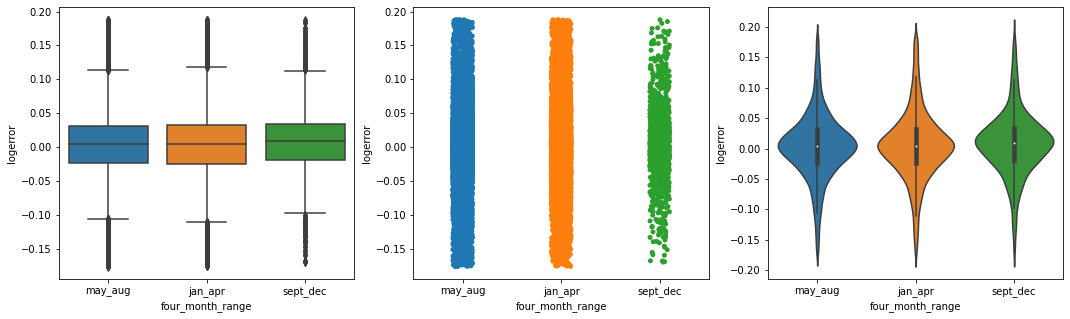

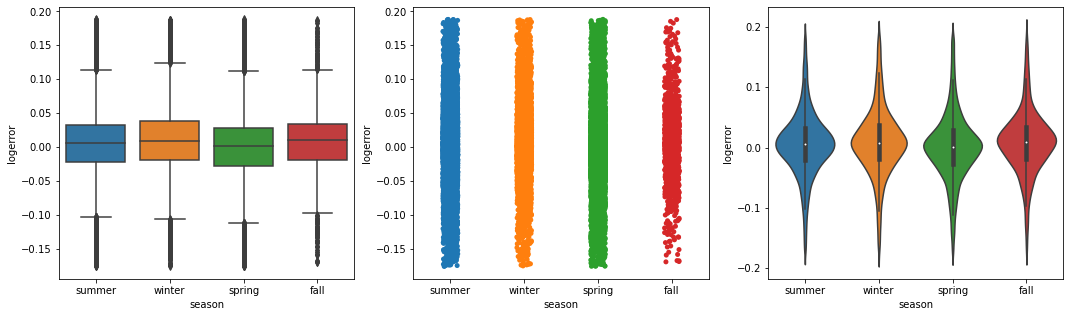

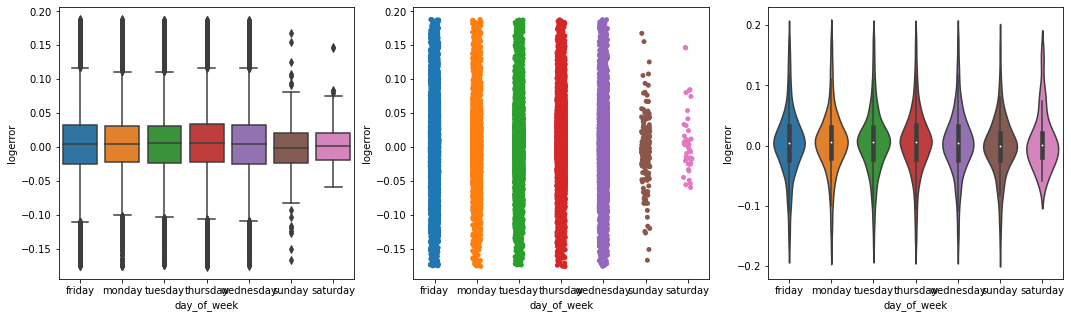

<Figure size 720x360 with 0 Axes>

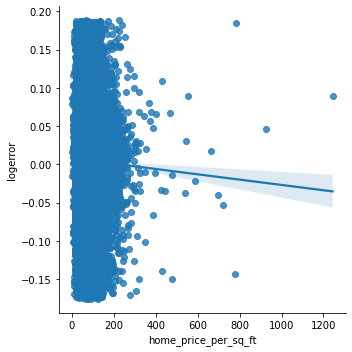

<Figure size 720x360 with 0 Axes>

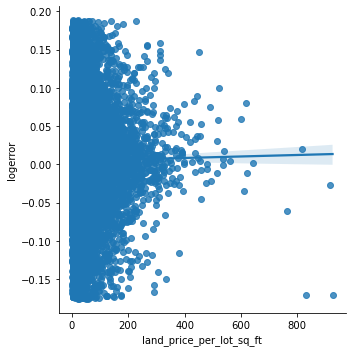

<Figure size 720x360 with 0 Axes>

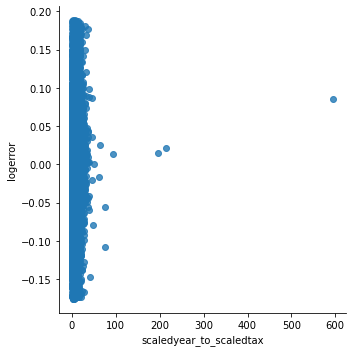

In [35]:
for column in new_columns:
    if train[column].dtype == np.number:
        plt.figure(figsize=(10,5))
        sns.lmplot(data = train, x = column, y = 'logerror')
        plt.show()
    else:
        plt.figure(figsize=(18, 5))
        plt.subplot(131)
        sns.boxplot(x=column, y='logerror', data=train)
        plt.subplot(132)
        sns.stripplot(x=column, y='logerror', data=train)
        plt.subplot(133)
        sns.violinplot(x=column, y='logerror', data=train)
        plt.show()

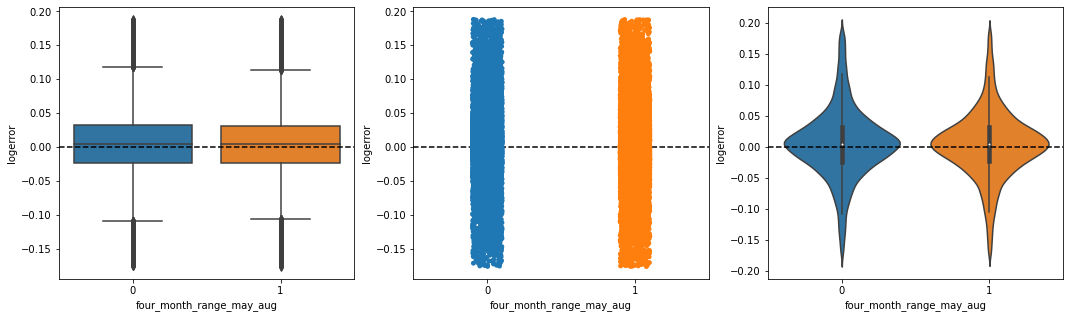

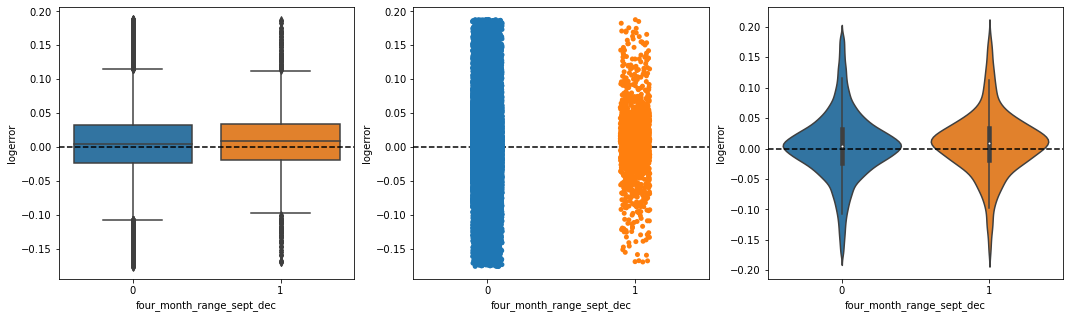

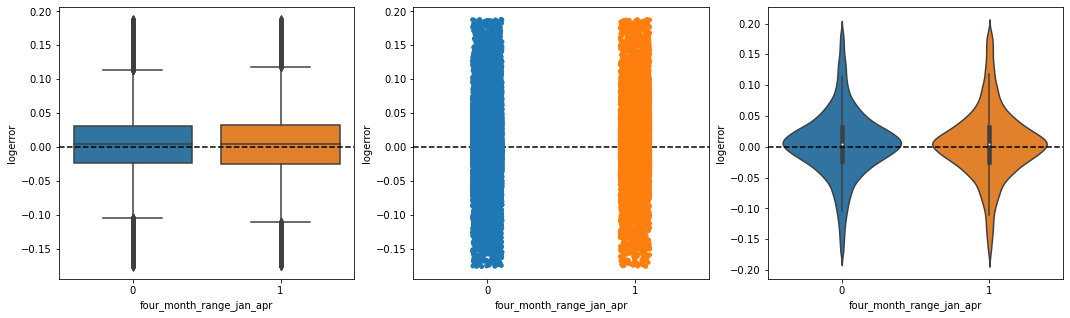

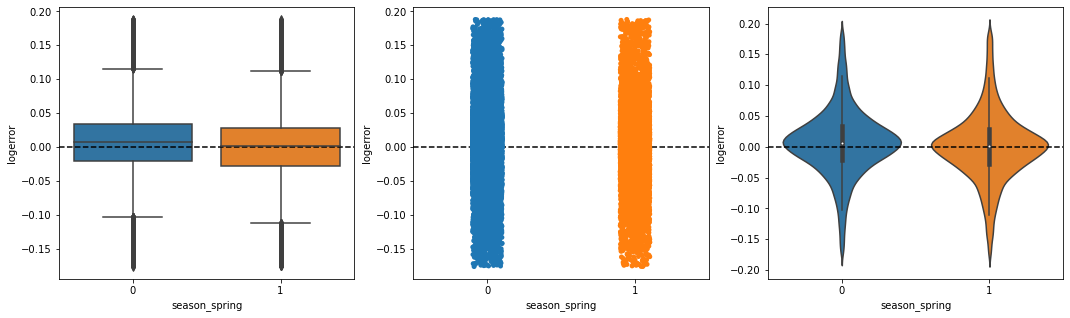

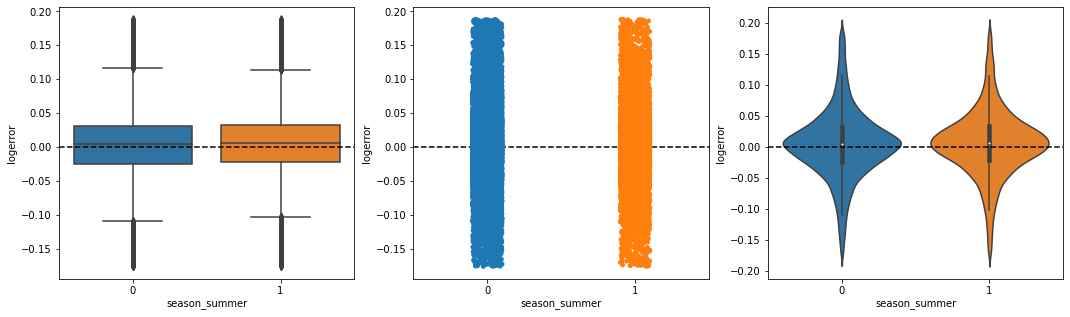

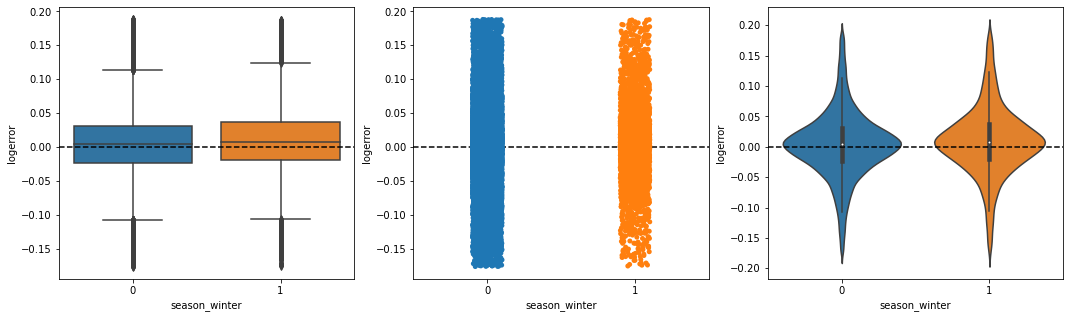

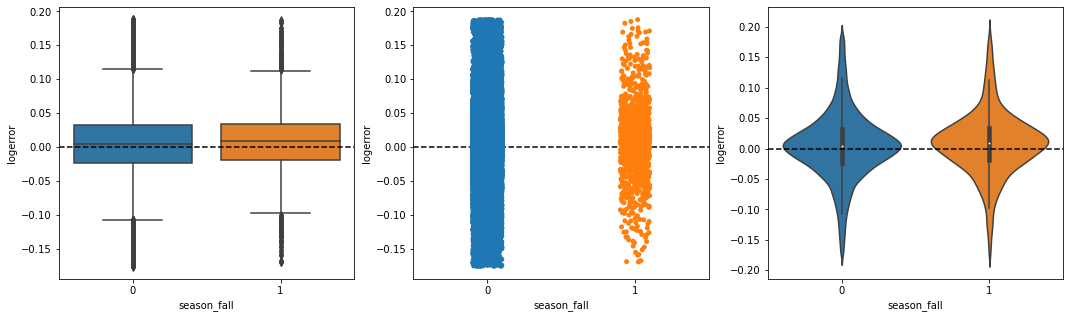

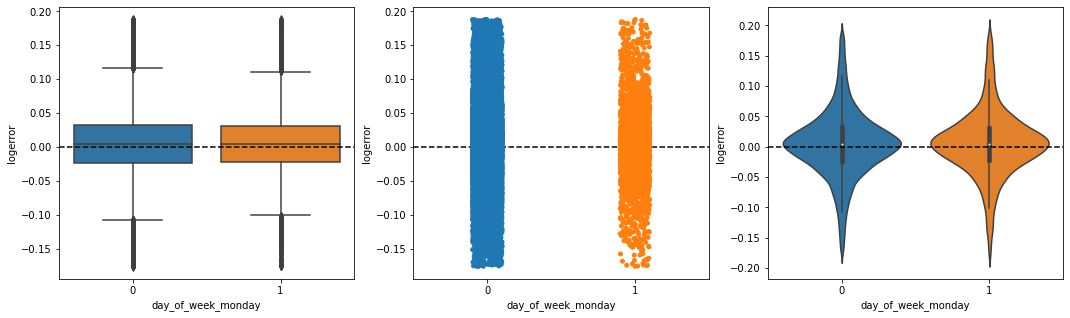

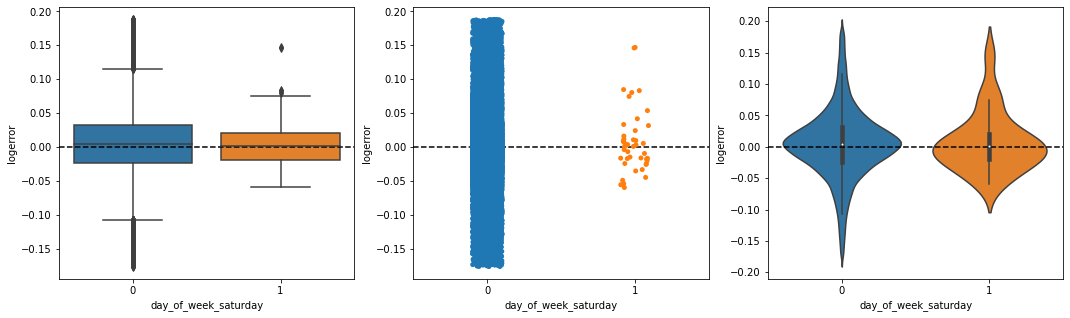

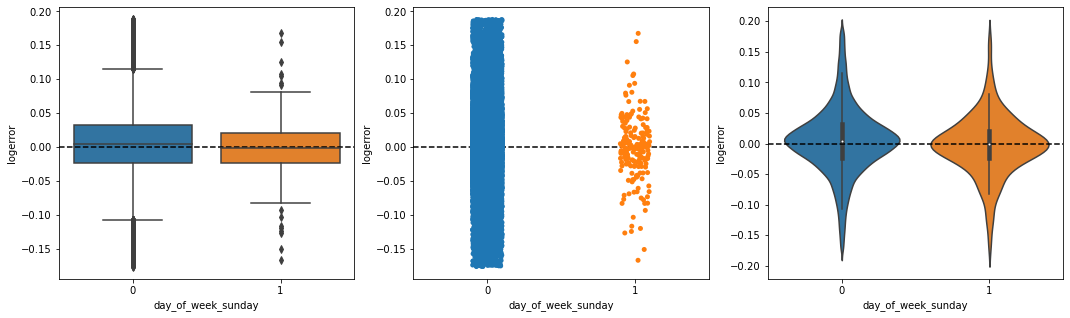

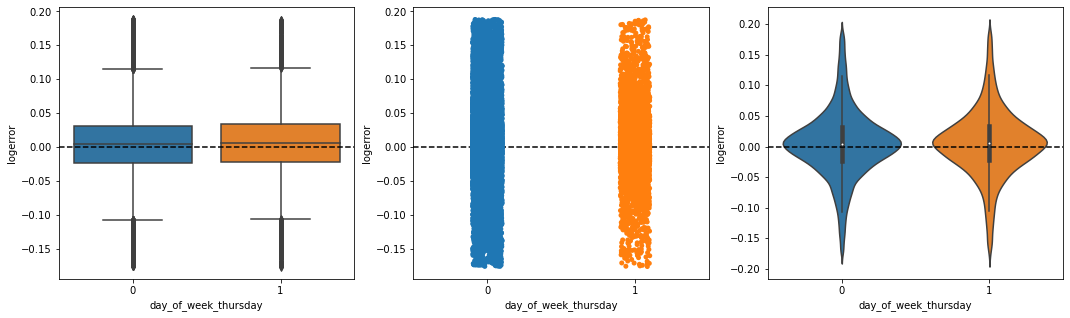

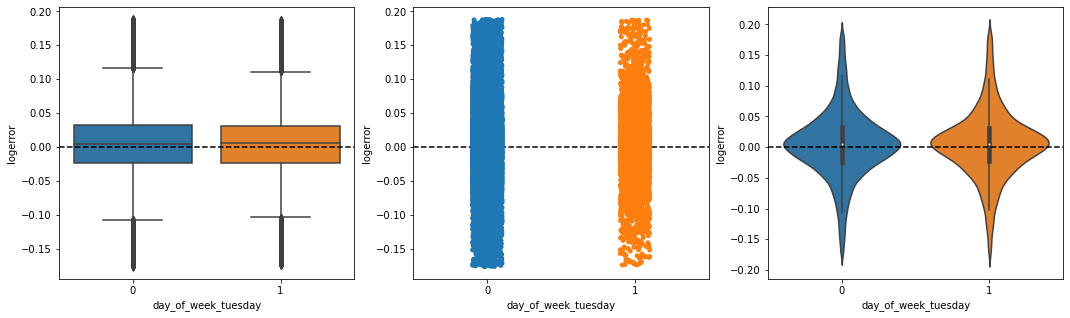

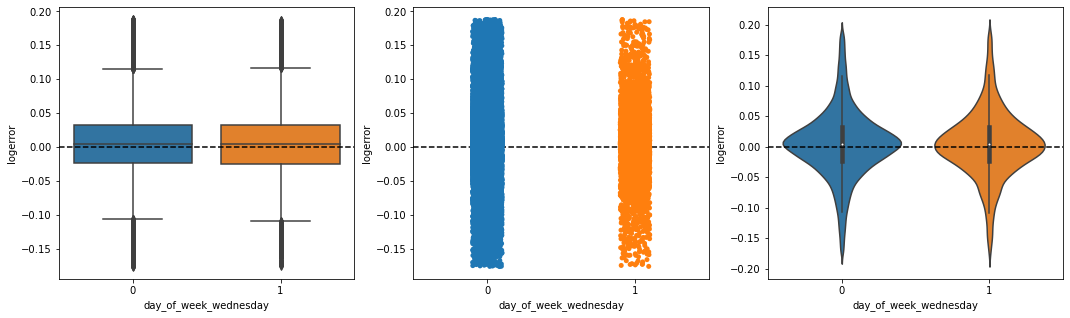

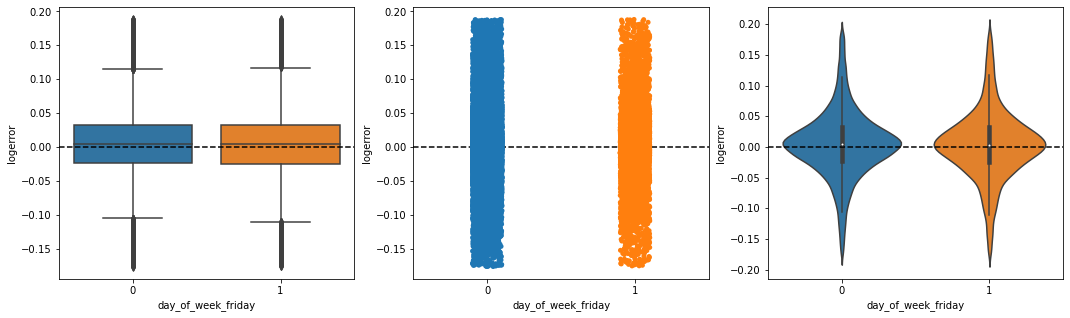

In [66]:
for column in encoded_columns:
    if encoded_train[column].dtype == np.number:
        plt.figure(figsize=(10,5))
        sns.lmplot(data = encoded_train, x = column, y = 'logerror')
        plt.show()
    else:
        plt.figure(figsize=(18, 5))
        plt.subplot(131)
        sns.boxplot(x=column, y='logerror', data=encoded_train)
        plt.axhline(0, color = 'black', ls = "--")
        plt.subplot(132)
        sns.stripplot(x=column, y='logerror', data=encoded_train)
        plt.axhline(0, color = 'black', ls = "--")
        plt.subplot(133)
        sns.violinplot(x=column, y='logerror', data=encoded_train)
        plt.axhline(0, color = 'black', ls = "--")
        plt.show()

**Takeaways**

The only thing that stood out to me from visual inspection was that *maybe* spring had a lower logerror overall than the rest of the population.

Also maybe four_month_range_sept_dec (or season_fall) might've had a higher logerror overall than the rest of the population. I can test both these observations here with t-tests.


##### Hypothesis 1
alpha = .05

$H_{0}$ = The logerror for homes sold in the Spring months is equal to or higher than homes sold in the other months.

$H_{a}$ = The logerror for homes sold in the Spring months is lower than homes sold in the other months.

In [84]:
spring_homes = train[train.season == "spring"]
nonspring_homes = train[train.season != "spring"]

# Setting alpha
alpha = .05

In [86]:
#Testing for variance with levene
stats.levene(spring_homes.logerror, nonspring_homes.logerror)

LeveneResult(statistic=5.931958140559606, pvalue=0.014876064288118688)

In [87]:
# Based on the Levene test above I need to set equal_var = False

# Running ttest to see if mean of logerror for homes sold in the spring is different than the entire population.
stats.ttest_ind(spring_homes.logerror, nonspring_homes.logerror, equal_var=False)

Ttest_indResult(statistic=-7.750635341945918, pvalue=9.636710968424114e-15)

I reject the null hypothesis, the logerror for homes sold in the Spring months is statistically significant lower than homes sold in the other months.

Visualization below.

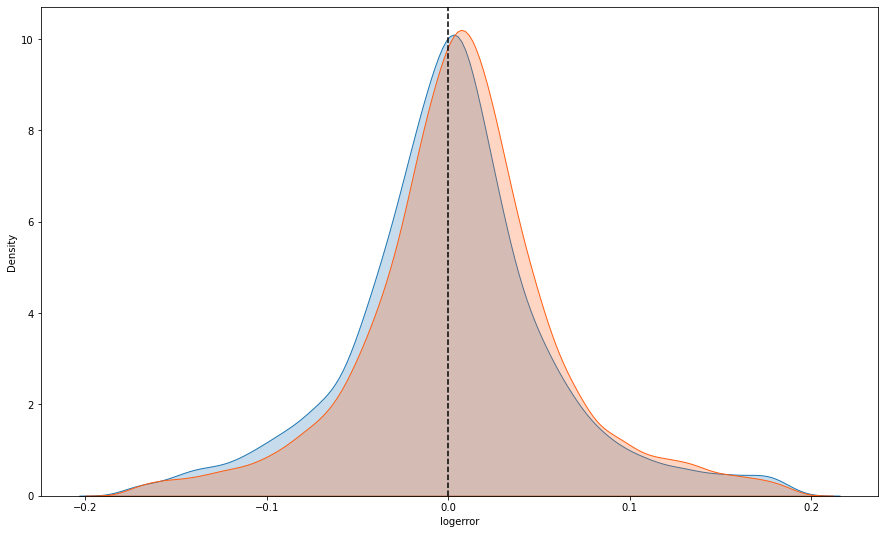

In [108]:
plt.figure(figsize=(15,9))
sns.kdeplot(data = spring_homes, x = 'logerror', shade=True)
sns.kdeplot(data = nonspring_homes, x = 'logerror', color = '#FF5E13', shade= True)
plt.axvline(0, c='black', ls = '--')
plt.show()

Before running a hypothesis test for four_month_range_sept_dec I want to compare it to season fall as they were both larger than the rest of their categories

In [114]:
sept_dec_homes = train[train.four_month_range == 'sept_dec']
fall_homes = train[train.season == 'fall']
non_fall_homes = train[train.season != 'fall']

In [113]:
sept_dec_homes.logerror.describe(), fall_homes.logerror.describe()

(count    1441.000000
 mean        0.008797
 std         0.052359
 min        -0.169302
 25%        -0.018872
 50%         0.009679
 75%         0.033937
 max         0.187886
 Name: logerror, dtype: float64,
 count    1441.000000
 mean        0.008797
 std         0.052359
 min        -0.169302
 25%        -0.018872
 50%         0.009679
 75%         0.033937
 max         0.187886
 Name: logerror, dtype: float64)

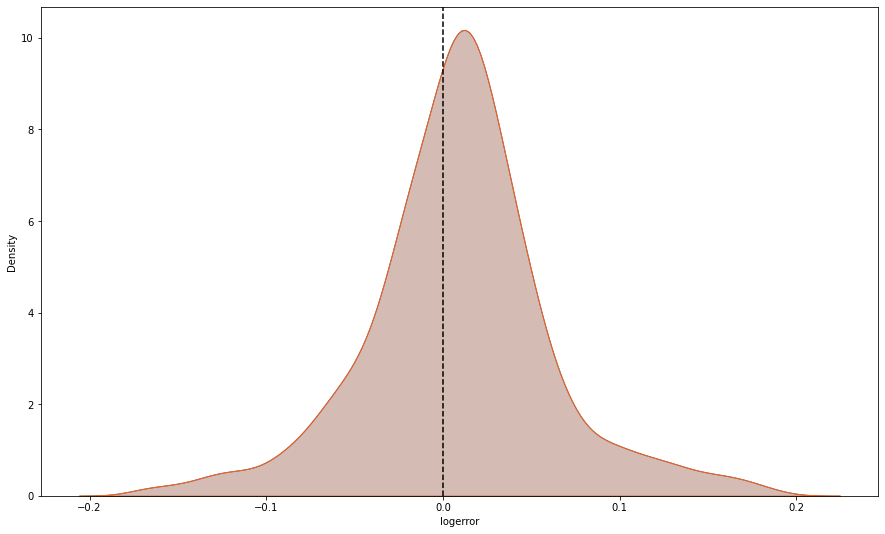

In [110]:
plt.figure(figsize=(15,9))
sns.kdeplot(data = sept_dec_homes, x = 'logerror', shade=True)
sns.kdeplot(data = fall_homes, x = 'logerror', color = '#FF5E13', shade= True)
plt.axvline(0, c='black', ls = '--')
plt.show()

As we see visually and statiscally this is the *exact* same data. So for in keepng it with the season from above, I'll use the fall homes category and compare that to non fall homes.

##### Hypothesis 2
alpha = .05

$H_{0}$ = The logerror for homes sold in the Fall months is equal to or lower than homes sold in the other months.

$H_{a}$ = The logerror for homes sold in the Fall months is higher than homes sold in the other months.

In [115]:
#Testing for variance with levene
stats.levene(fall_homes.logerror, non_fall_homes.logerror)

LeveneResult(statistic=5.911777959652572, pvalue=0.015047378474454884)

In [119]:
# Based on the Levene test above I can leave equal_var = True

# Running ttest to see if mean of logerror for homes sold in the fall is different than the entire population.
stats.ttest_ind(fall_homes.logerror, non_fall_homes.logerror, equal_var=True)

Ttest_indResult(statistic=2.792295451430509, pvalue=0.005237765601276555)

I reject the null hypothesis and determine that homes sold in the Fall months have a statistically significant higher logerror than homes sold in the other months. 

Visualization below.

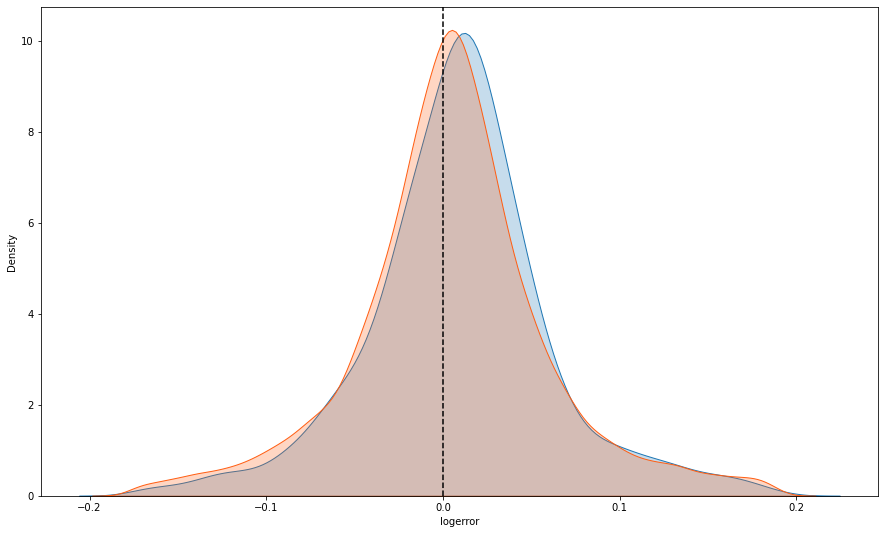

In [121]:
plt.figure(figsize=(15,9))
sns.kdeplot(data = fall_homes, x = 'logerror', shade=True)
sns.kdeplot(data = non_fall_homes, x = 'logerror', color = '#FF5E13', shade= True)
plt.axvline(0, c='black', ls = '--')
plt.show()

##### Takeaways
From these two hypothesis tests I can determine the following.
- Homes sold in the Spring have a statistically signficant logerror that is lower than the rest of the year.
- Homes sold in the Fall have a statistically signficant logerror that is higher than the rest of the year.

I will include both of these features in my final model.

Looking at a heatmap of all the things now.

<AxesSubplot:>

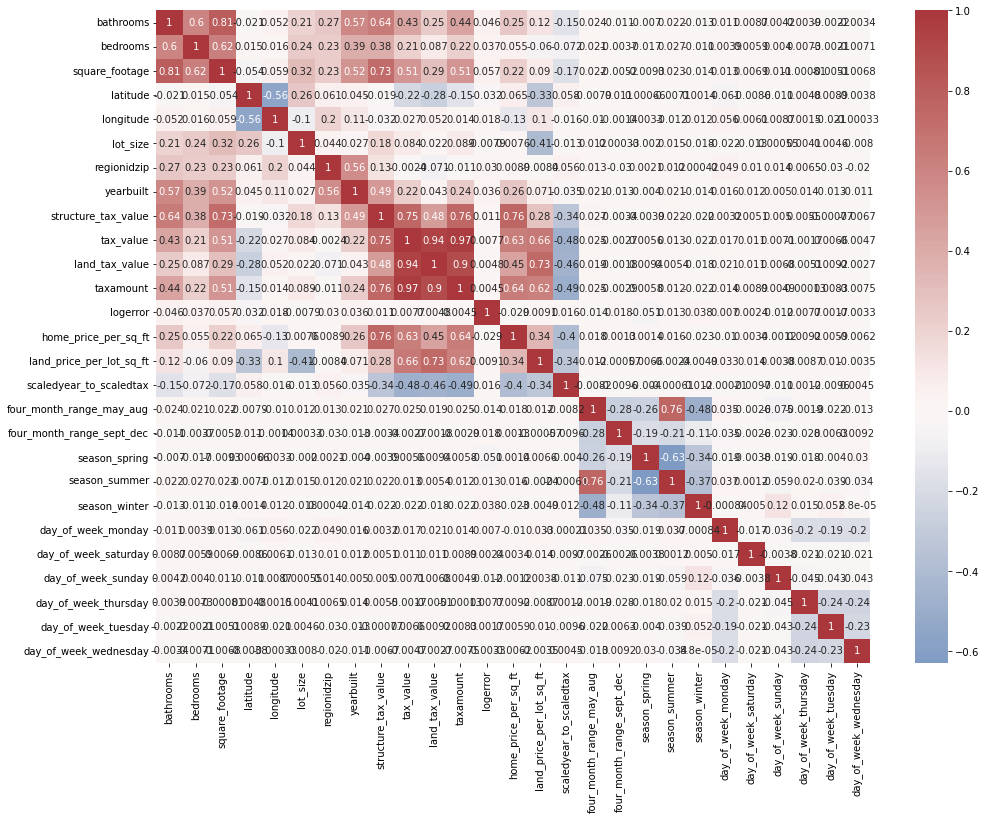

In [49]:
plt.figure(figsize=(16,12))
sns.heatmap(encoded_train.corr(), annot=True, center = 0, cmap='vlag')

None of the new features created correlate directly with logerror.

## Clustering